# We start with a large graph with N nodes and avergae in-degree g. There are Kuramoto oscillators at each node. We observe M out the N nodes.

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sys
import os
sys.path.append('packages/')
from utilities import *
from importlib import reload
#from utilities reload *
import utilities
import networkx as nx
import sdeint

In [2]:
plt.rcParams.update({'font.size': 16,'font.family':'arial'})

In [3]:
#Parameters:
T      = 10.
deltaT = 0.001
num_species = 100
degree = 5
num_subnw   = 90
num_bulk    = 10 #Convention: in the vector of conc. the subnetwork species appear first
parameters  = np.ones(num_species)*1
Ω           = 1.*((np.random.rand(num_species)*0.2)-0.1)

In [4]:
np.mean(Ω)

0.002215110145456911

In [5]:
nw1 = nx.gnm_random_graph(num_species,num_species*degree,directed=True)

In [6]:
np.mean([nw1.out_degree[i] for i in range(num_species)])

5.0

In [7]:
np.mean([nw1.in_degree[i] for i in range(num_species)])

5.0

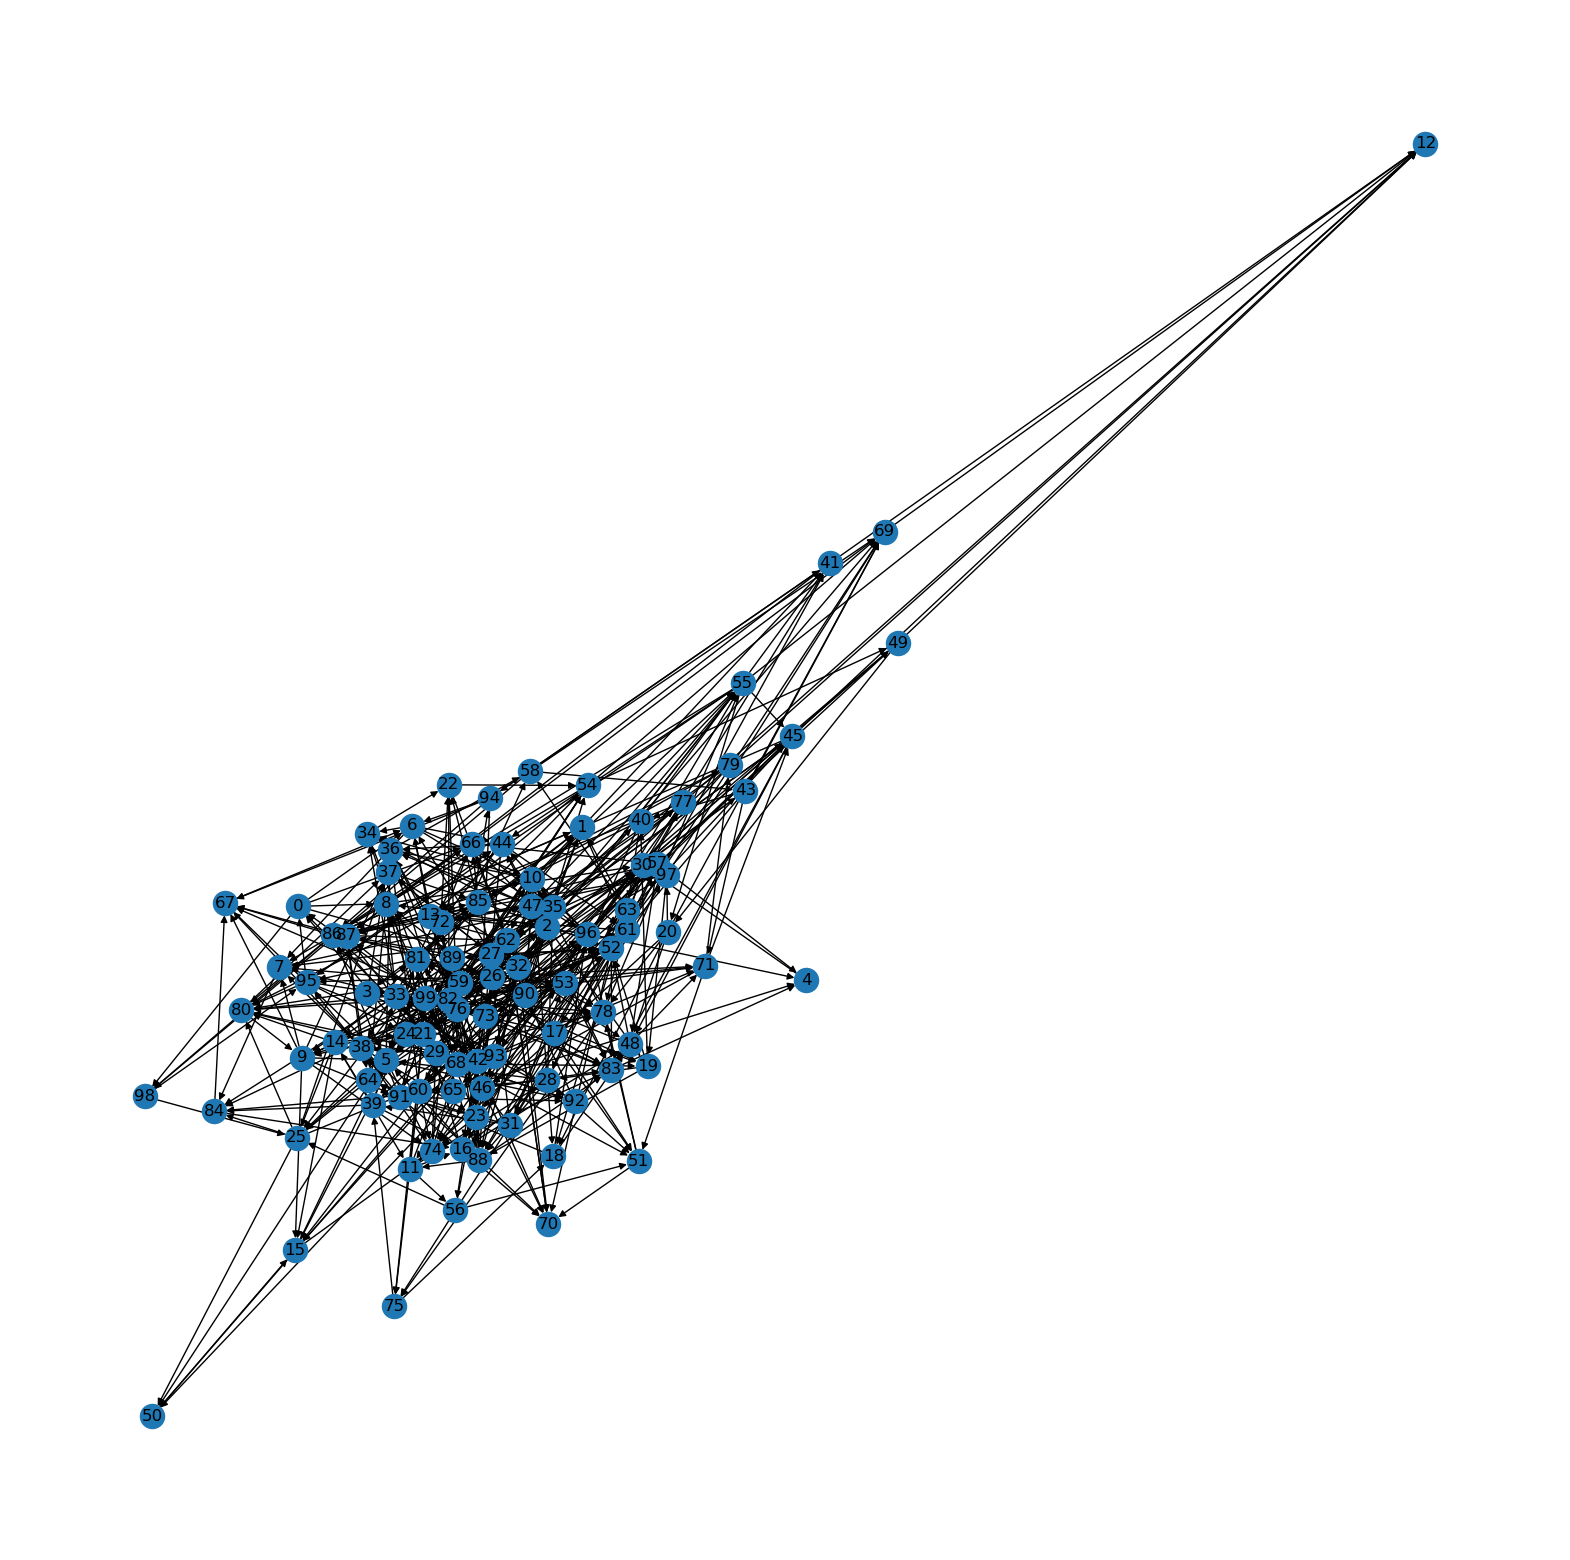

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))
nx.draw(nw1, with_labels=True)
#subax2 = plt.subplot(122)

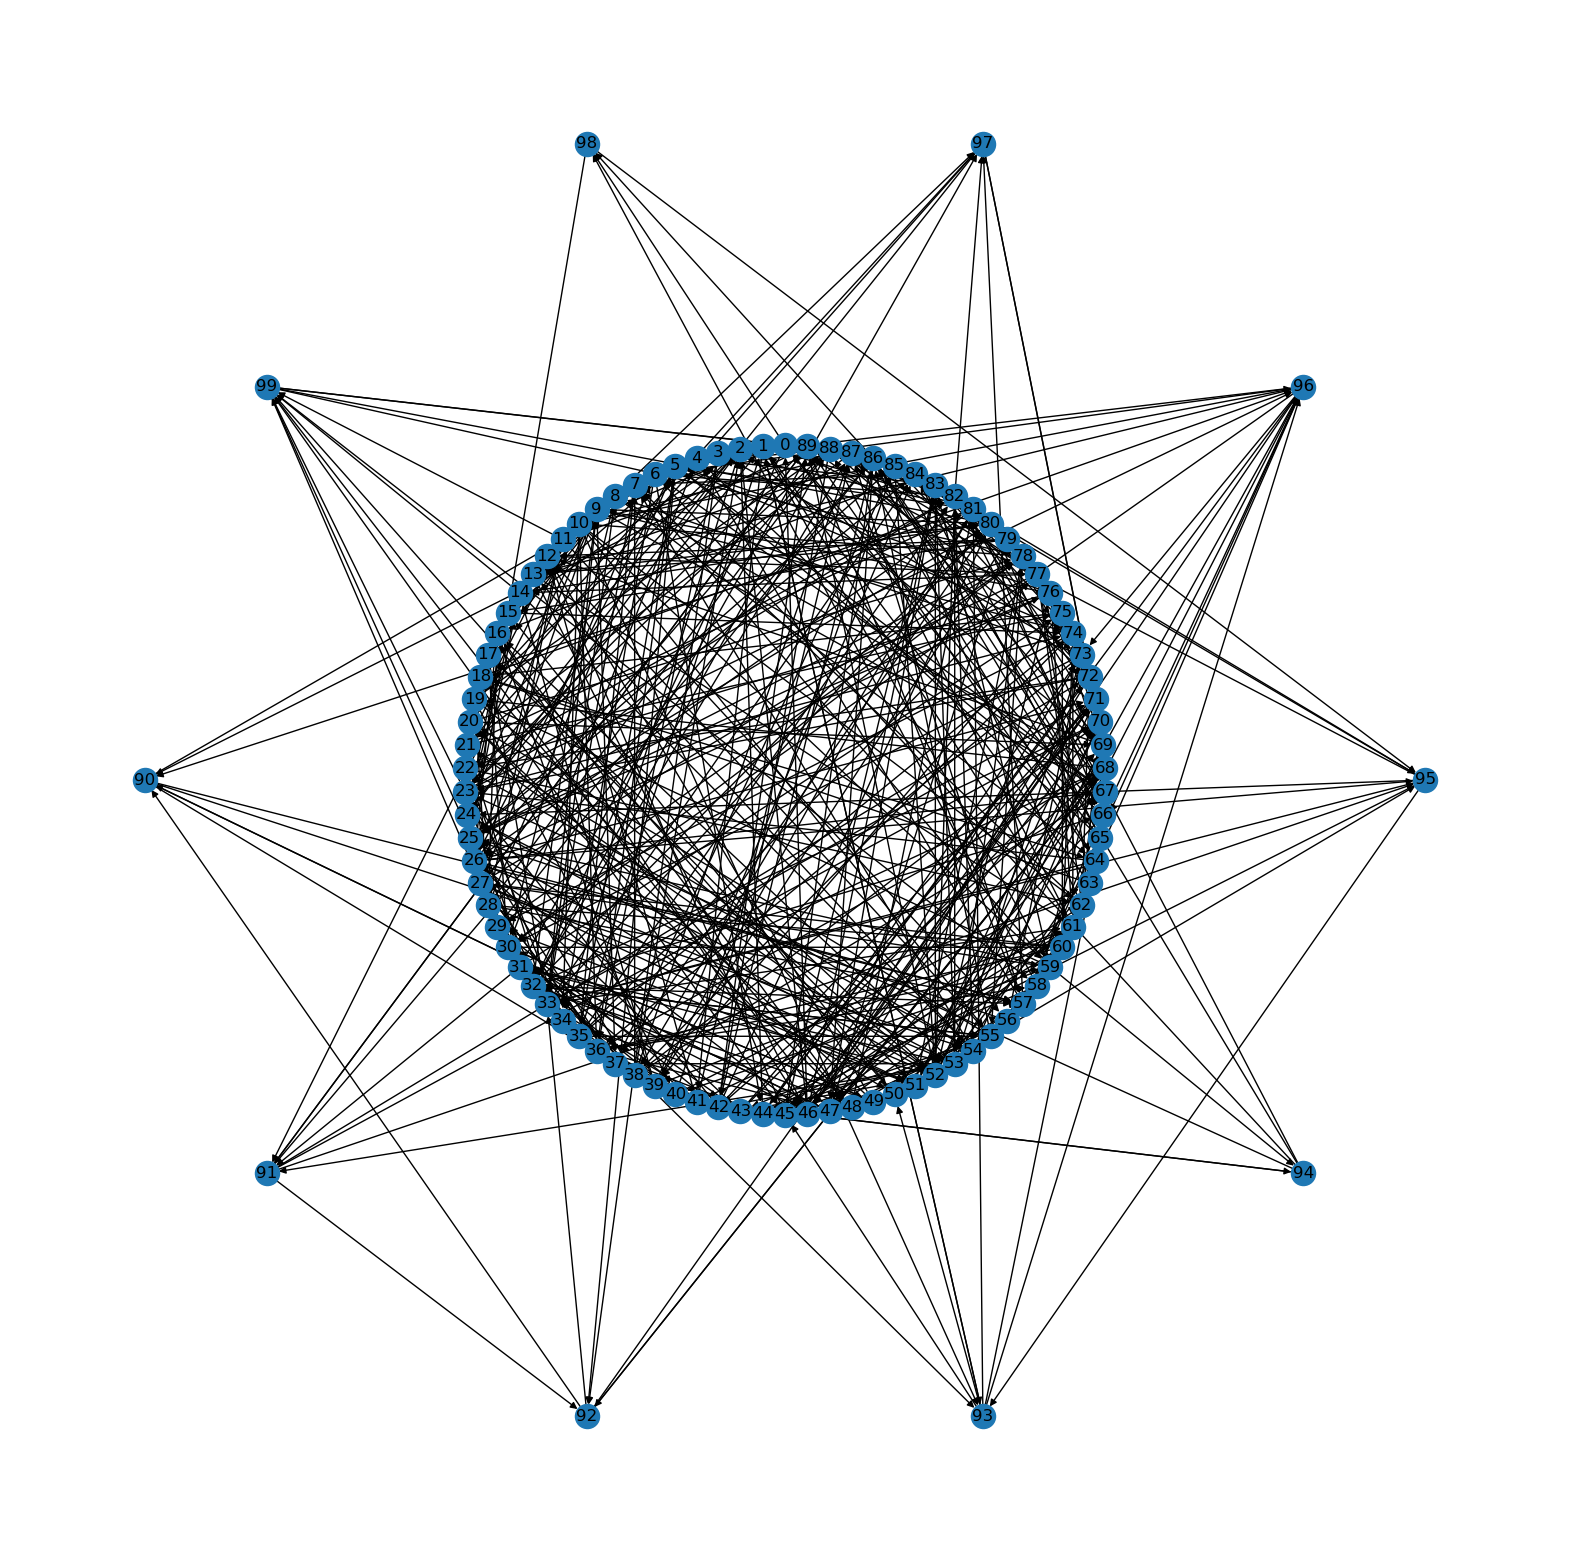

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
shells = [range(90), range(90,100)]
nx.draw_shell(nw1, nlist=shells, with_labels=True)

In [10]:
color_list_2 = color_list_1.copy()
for i in range(num_subnw):
    if i not in boundary_list:
        color_list_2[i] = "orange" #.append("#1f78b4")
#for i not in boundary_list:
#    color_list_2[i] = 'lightblue'
#for i in range(num_subnw,num_species):
#    color_list_2[i] = "gray"

NameError: name 'color_list_1' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
nx.draw_networkx(nw1,pos = layout_spring,arrows=True,arrowstyle= arrows,node_size=1500,font_weight='bold',node_color=color_list_2)

### Find the list of boundary nodes and the interior nodes. The boundary nodes are the ones which have in_edges from the bulk species:

In [12]:
def find_boundaries(nw,bulk_species):

    #bulk_species  = np.arange(90,100)
    boundary_list = []

    for sp in bulk_species:
        recieving_nodes = [[i for i in nw.out_edges(sp)][j][1] for j in range(len([i for i in nw.out_edges(sp)]))]
        for j in recieving_nodes:
            if j not in boundary_list and j not in bulk_species:
                boundary_list.append(j)
            
    return(np.sort(boundary_list))

#### Also define the complement of the boundary species using In_edges:

In [13]:
def find_boundaries_out(nw,bulk_species):

    #bulk_species  = np.arange(90,100)
    boundary_list = []

    for sp in bulk_species:
        recieving_nodes = [[i for i in nw.in_edges(sp)][j][0] for j in range(len([i for i in nw.in_edges(sp)]))]
        for j in recieving_nodes:
            if j not in boundary_list and j not in bulk_species:
                boundary_list.append(j)
            
    return(np.sort(boundary_list))

In [14]:
boundary_list = find_boundaries(nw1,np.arange(num_subnw,num_species))
print(boundary_list)

[ 0  1  4  6 10 11 13 19 23 24 25 30 33 38 41 44 45 46 47 50 53 54 57 58
 65 66 67 68 69 70 71 72 73 78 80 81 86 87 89]


In [15]:
boundary_list_out = find_boundaries_out(nw1,np.arange(num_subnw,num_species))
print(boundary_list_out)

[ 0  1  3  5  6  9 10 11 13 14 18 20 23 26 30 31 33 41 47 51 53 55 57 58
 59 64 68 81 82 86 89]


In [16]:
len(boundary_list)

39

In [17]:
def dynamcical_system_KM(x,t):
    y    = np.zeros(nw.number_of_nodes()) + Ω #- np.mean(Ω)
    
    for i in range(len(y)):
        in_edges = [[p for p in nw.in_edges(i)][n][0] for n in range(len([m for m in nw.in_edges(i)]))]
        #print(in_edges)
        for j in in_edges:
            y[i] += c[i]*np.sin(x[j] - x[i])
            #print(j,i,c[i])
        in_edges = []
    return y

In [18]:
def wiener_KM(x,t):
    y    = η*np.ones(nw.number_of_nodes()) #+ Ω #- np.mean(Ω)
    #return np.expand_dims(y,axis=1)
    return np.diag(y)

In [19]:
nw,c,Ω,η = nw1,parameters,Ω,10**(-5)

In [20]:
dynamcical_system_KM(np.random.rand(num_species),0)

array([-1.75099875,  0.12449106, -0.89107961,  0.0647497 , -0.96314919,
        1.37910087, -2.36701955, -2.58650015,  2.86632964,  1.47724301,
       -0.63411266, -0.27678056,  2.01925575,  1.08820302, -0.02634645,
       -1.74803188, -1.98209282, -0.04273228,  0.03974293, -0.26849144,
        0.14238686, -0.49830302, -0.15898662, -2.68754169,  0.14528617,
       -1.15423095, -2.26313598,  1.64984167,  0.06527892, -0.31135024,
       -3.91460522,  0.30948083, -2.06936351,  1.92170137,  1.75828174,
       -0.5089535 , -0.54669596, -2.54859225,  1.20005158, -0.61350708,
       -0.82448696, -0.72895561, -2.31030585,  1.22172496,  1.06564254,
       -0.25990334, -2.10002187,  2.17231147,  0.01746497, -0.57365657,
        0.55529308, -0.94031499,  2.81228439, -0.78742175,  1.51662637,
        2.00462091,  0.08237651, -2.31720959, -1.39476821,  1.54882748,
       -1.59380056,  0.41488888,  0.93691354,  0.5772957 , -1.76730126,
        0.62278493, -1.07767971,  0.17114647, -0.52461342, -1.09

In [41]:
wiener_KM(np.random.rand(num_species),0)

array([[1.e-05, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 1.e-05, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 1.e-05, ..., 0.e+00, 0.e+00, 0.e+00],
       ...,
       [0.e+00, 0.e+00, 0.e+00, ..., 1.e-05, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 1.e-05, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 1.e-05]])

In [22]:
noise_list = np.logspace(-5,-1,10)
print(noise_list)

[1.00000000e-05 2.78255940e-05 7.74263683e-05 2.15443469e-04
 5.99484250e-04 1.66810054e-03 4.64158883e-03 1.29154967e-02
 3.59381366e-02 1.00000000e-01]


In [21]:
num_repeats_list = np.int32(np.ceil(np.logspace(2,3,5)))
print(num_repeats_list)

[ 100  178  317  563 1000]


In [26]:
deltaT = 0.02
T = 0.2
Num_runs = num_repeats_list[-1]

In [57]:
soln      = np.zeros([len(noise_list),int(T/deltaT)*Num_runs,num_species])
obs       = np.zeros([len(noise_list),int(T/deltaT)*Num_runs,num_species])
obs_noise = np.zeros([len(noise_list),int(T/deltaT)*Num_runs,num_species])

for n in range(len(noise_list)):

    η = noise_list[n]

    for i in range(Num_runs):    
        init_cond = 1.*((np.random.rand(num_species)*0.2) - 0.1)

        soln_temp = (sdeint.itoEuler(f=dynamcical_system_KM,G=wiener_KM,y0=init_cond,tspan=np.arange(0,T,deltaT)))

        soln[n,int(T/deltaT)*i:int(T/deltaT)*(i+1),:]    = soln_temp

        for j in range(num_subnw):        
            obs_noise[n,int(T/deltaT)*i:int(T/deltaT)*(i+1),j]   = np.gradient((soln_temp[:,j]),deltaT)

        obs[n,int(T/deltaT)*i:int(T/deltaT)*(i+1),:] = [dynamcical_system_KM(soln_temp[tt,:],0) + np.diag(wiener_KM(soln_temp[tt,:],0)) for tt in range(int(T/deltaT))]


(0.0, 1.0)

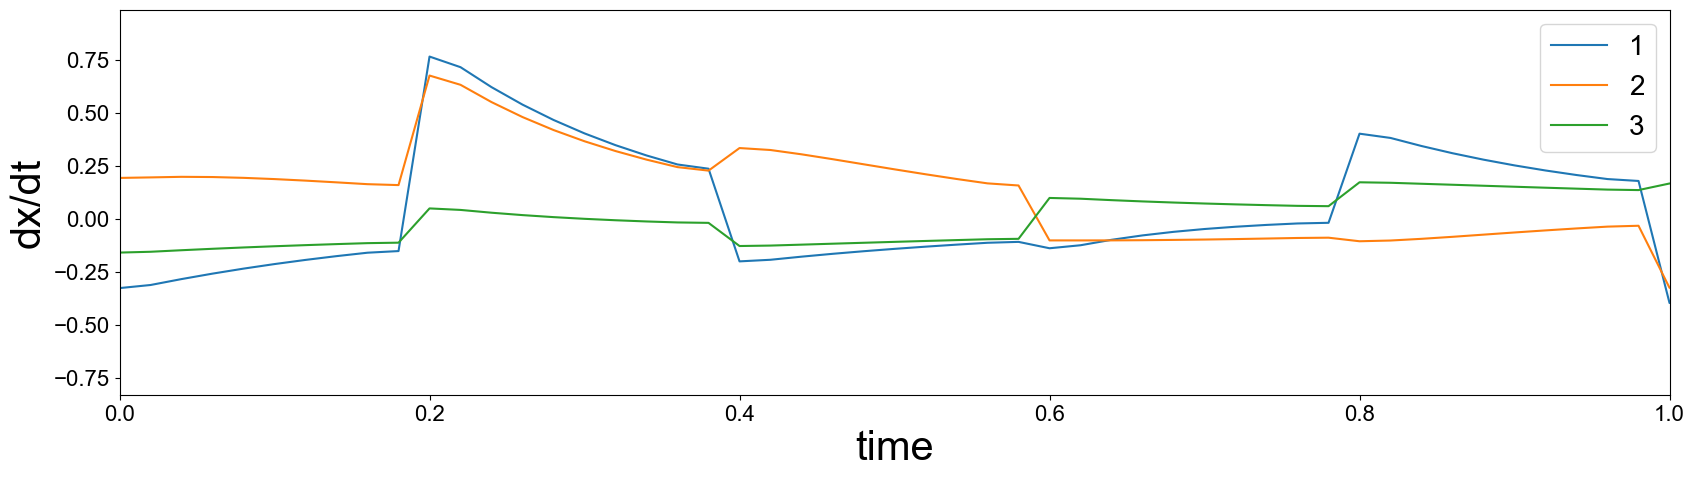

In [58]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,Num_runs*T,deltaT),obs_noise[0,:,0])
plt.plot(np.arange(0,Num_runs*T,deltaT),obs_noise[0,:,1])
plt.plot(np.arange(0,Num_runs*T,deltaT),obs_noise[0,:,2])
plt.xlabel('time',fontsize=30)
plt.ylabel('dx/dt',fontsize=30)
plt.legend(['1','2','3'],fontsize=20)
plt.xlim((0,1))

(0.0, 1.0)

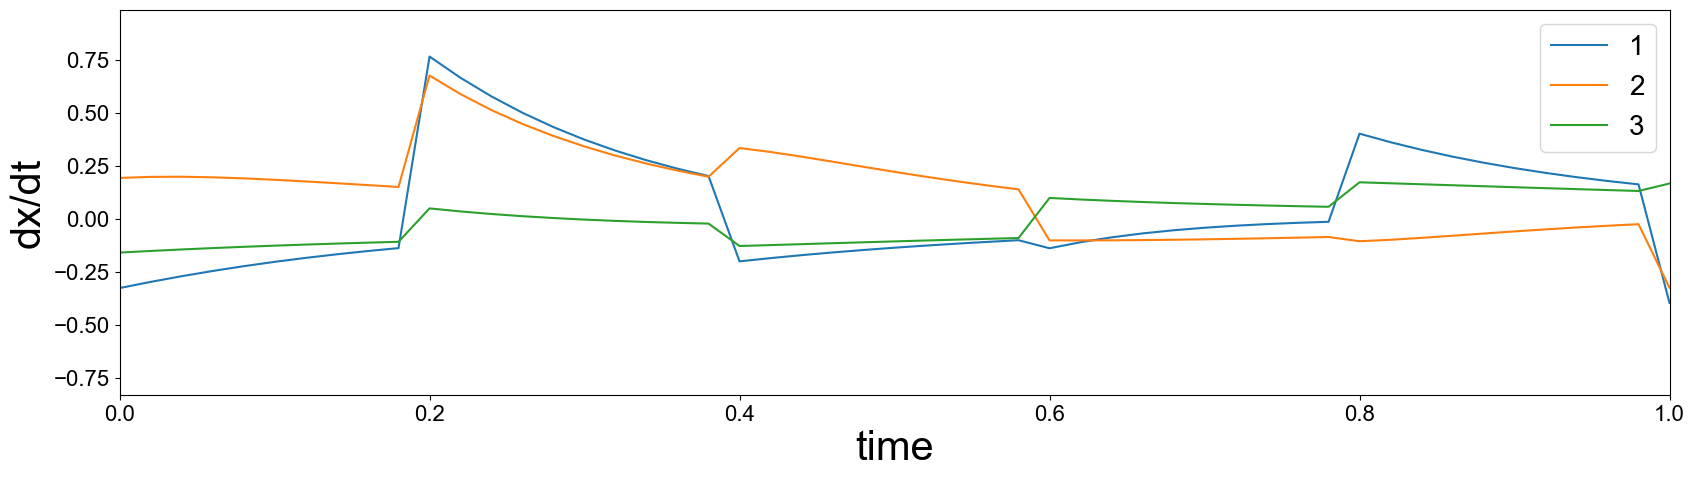

In [59]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,Num_runs*T,deltaT),obs[0,:,0])
plt.plot(np.arange(0,Num_runs*T,deltaT),obs[0,:,1])
plt.plot(np.arange(0,Num_runs*T,deltaT),obs[0,:,2])
plt.xlabel('time',fontsize=30)
plt.ylabel('dx/dt',fontsize=30)
plt.legend(['1','2','3'],fontsize=20)
plt.xlim((0,1))

(0.0, 1.0)

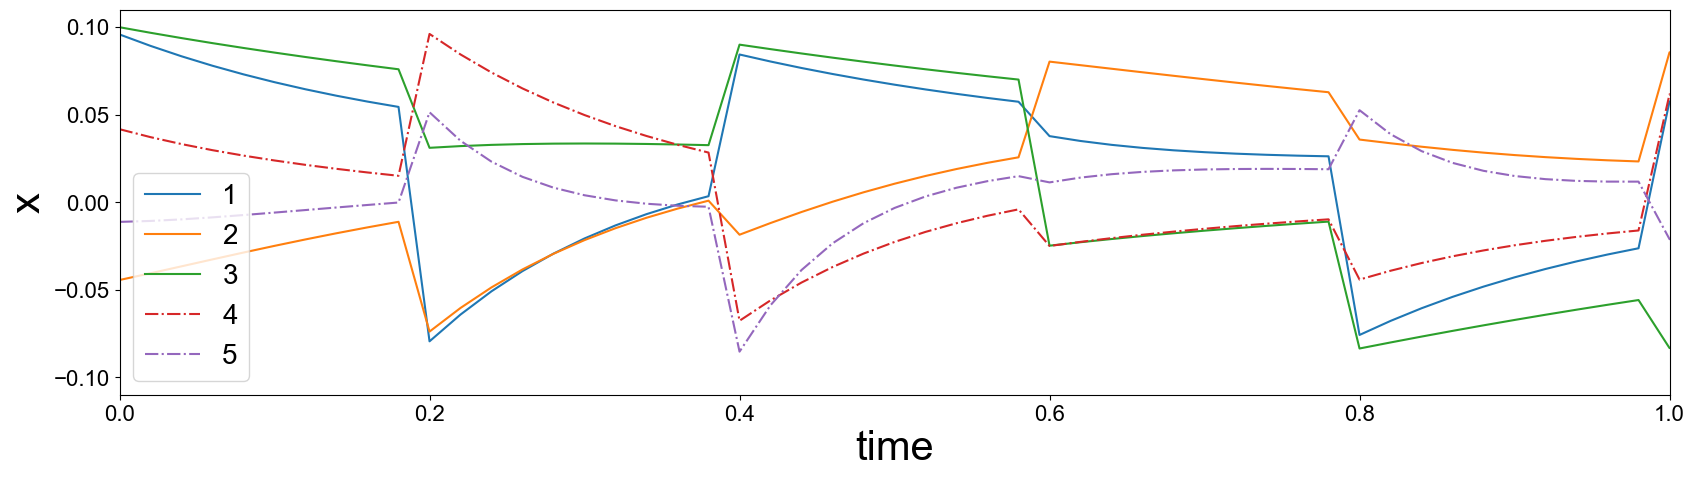

In [60]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,Num_runs*T,deltaT),soln[0,:,0])
plt.plot(np.arange(0,Num_runs*T,deltaT),soln[0,:,1])
plt.plot(np.arange(0,Num_runs*T,deltaT),soln[0,:,2])
plt.plot(np.arange(0,Num_runs*T,deltaT),soln[0,:,3],'-.')
plt.plot(np.arange(0,Num_runs*T,deltaT),soln[0,:,4],'-.')
plt.xlabel('time',fontsize=30)
plt.ylabel('x',fontsize=30)
plt.legend(['1','2','3','4','5'],fontsize=20)
#plt.xlim((0,5))
plt.xlim((0,1))

(0.0, 1.0)

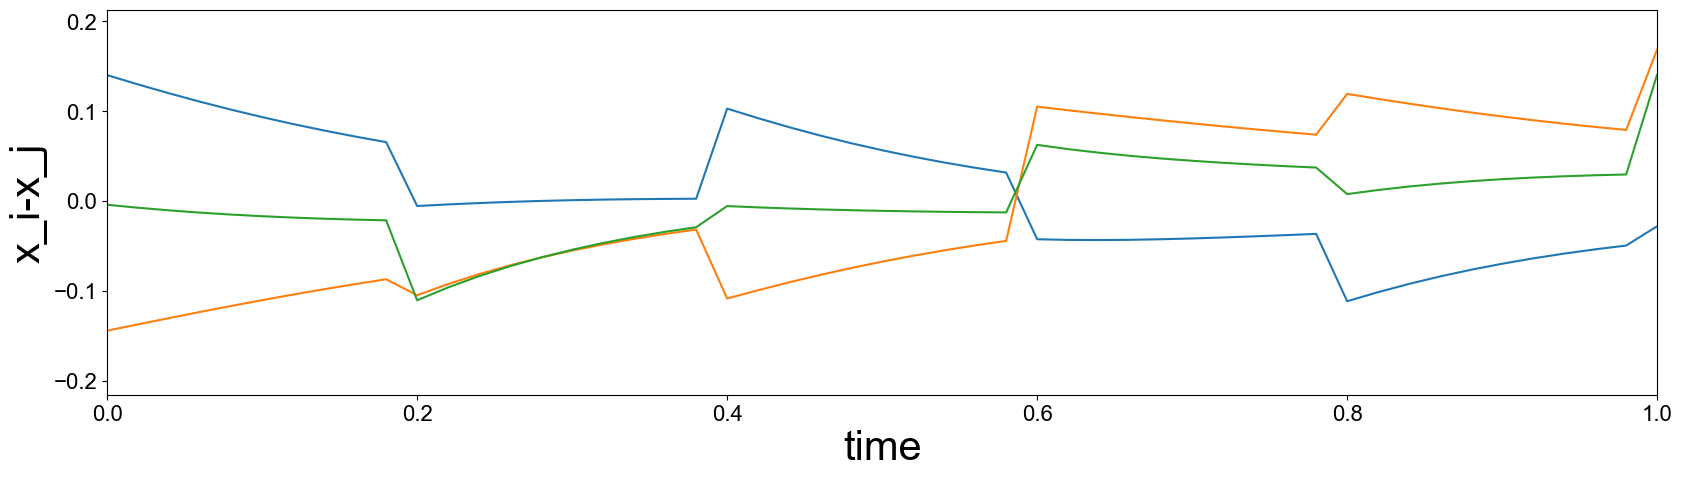

In [61]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,Num_runs*T,deltaT),soln[0,:,0]-soln[0,:,1])
plt.plot(np.arange(0,Num_runs*T,deltaT),soln[0,:,1]-soln[0,:,2])
plt.plot(np.arange(0,Num_runs*T,deltaT),soln[0,:,0]-soln[0,:,2])
plt.xlabel('time',fontsize=30)
plt.ylabel('x_i-x_j',fontsize=30)
plt.xlim((0,1))

In [62]:
from sklearn import linear_model

alpha_opt            = np.zeros((len(num_repeats_list),len(noise_list),num_subnw))
beta_opt             = np.zeros((len(num_repeats_list),len(noise_list),num_subnw))
ordered_beta_log     = np.zeros((len(num_repeats_list),len(noise_list),num_subnw))
auc_list             = np.zeros((len(num_repeats_list),len(noise_list)))
#repeats_required     = np.zeros(len(noise_list))


for n in range(len(noise_list)):

    for n_reps in range(len(num_repeats_list)):
    
        d1  = utilities.design_matrix_KM(soln[n,:int(T/deltaT)*num_repeats_list[n_reps],0:num_subnw])
        
        ridge_model = linear_model.BayesianRidge(alpha_init=1.,lambda_init=0.1,max_iter=100,fit_intercept=False,\
                                                       tol=1e-5,compute_score=True)
        
        for i in range(num_subnw):
        
            ridge_model.fit(X=d1,y=obs_noise[n,:int(T/deltaT)*num_repeats_list[n_reps],i])
            alpha_opt[n_reps,n,i] = 1./ridge_model.lambda_
            beta_opt[n_reps,n,i]  = ridge_model.alpha_        
        
        ordered_beta_log[n_reps,n,:] = np.log(np.append(beta_opt[n_reps,n,boundary_list],beta_opt[n_reps,n,[i for i in range(num_subnw) if i not in boundary_list]]))
        
        temp_list = np.copy(ordered_beta_log[n_reps,n,:])
        
        temp_list = np.expand_dims(temp_list,axis=0)
        
        auc_list[n_reps,n] = utilities.auc_roc(temp_list,beta_error=np.zeros(np.shape(temp_list))\
                        ,num_threshold=200,num_bdry=len(boundary_list),method='single',plot=False)
        
        print(n,n_reps)
        
    #ordered_beta_log = np.log(np.append(beta_opt[boundary_list],beta_opt[[i for i in range(num_subnw) if i not in boundary_list]]))
    #ordered_beta = np.expand_dims(ordered_beta,axis=0)
    
    

/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


0 0


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


0 1


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


0 2


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


0 3


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


0 4


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


1 0


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


1 1


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


1 2


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


1 3


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


1 4


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


2 0


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


2 1


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


2 2


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


2 3


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


2 4


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


3 0


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


3 3


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


3 4


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


4 0


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


4 1


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


4 2


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


4 3


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


4 4


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


5 0


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


5 1


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


5 2


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


5 3


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


5 4


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


6 0


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


6 1


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


6 2


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


6 3


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


6 4


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


7 0


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


7 1


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


7 2


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


7 3


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


7 4


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


8 0


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


8 1


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


8 2


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


8 3


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


8 4


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


9 0


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


9 1


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


9 2


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


9 3
9 4


/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


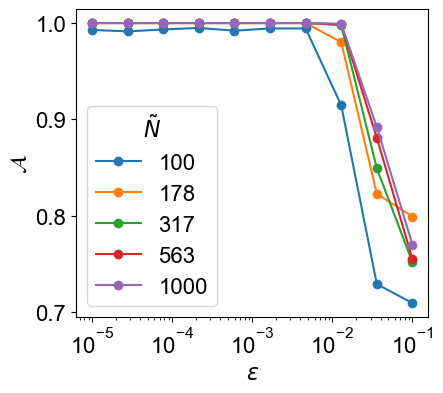

In [63]:
plt.figure(figsize=(10,4))

plt.subplot(121)
for i in range(len(num_repeats_list)):
    plt.plot(noise_list,auc_list[i,:],'o-')

plt.xscale('log')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathcal{A}$')
plt.legend(num_repeats_list,title=r'$\tilde N$')

In [23]:
noise_list2 = np.logspace(-3,0,10)
print(noise_list2)

[0.001      0.00215443 0.00464159 0.01       0.02154435 0.04641589
 0.1        0.21544347 0.46415888 1.        ]


In [24]:
num_repeats_list

array([ 100,  178,  317,  563, 1000], dtype=int32)

In [ ]:
Num

In [ ]:
soln2   = np.zeros([len(noise_list),int(T/deltaT)*Num_runs,num_species])
obs_noise2 = np.zeros([len(noise_list),int(T/deltaT)*Num_runs,num_species])

for n in range(len(noise_list2)):

    η = noise_list2[n]

    for i in range(Num_runs):    
        init_cond = 10*((np.random.rand(num_species)*0.2) - 0.1)

        soln_temp = (sdeint.itoEuler(f=dynamcical_system_KM,G=wiener_KM,y0=init_cond,tspan=np.arange(0,T,deltaT)))

        soln2[n,int(T/deltaT)*i:int(T/deltaT)*(i+1),:]    = soln_temp

        for j in range(num_subnw):        
            obs_noise2[n,int(T/deltaT)*i:int(T/deltaT)*(i+1),j]   = np.gradient((soln_temp[:,j]),deltaT)
    print(n)
        

In [ ]:
from sklearn import linear_model

alpha_opt3            = np.zeros((len(num_repeats_list),len(noise_list2),num_subnw))
beta_opt3             = np.zeros((len(num_repeats_list),len(noise_list2),num_subnw))
alpha_error3          = np.zeros((len(num_repeats_list),len(noise_list2),num_subnw))
beta_error3           = np.zeros((len(num_repeats_list),len(noise_list2),num_subnw))
ordered_beta3         = np.zeros((len(num_repeats_list),len(noise_list2),num_subnw))
ordered_beta_error3   = np.zeros((len(num_repeats_list),len(noise_list2),num_subnw))
auc_list3             = np.zeros((len(num_repeats_list),len(noise_list2)))


for n in range(len(noise_list2)):

    for n_reps in range(len(num_repeats_list)):
    
        d1  = utilities.design_matrix_KM(soln2[n,:int(T/deltaT)*num_repeats_list[n_reps],0:num_subnw])
        
        ridge_model2 = linear_model.BayesianRidge(alpha_init=1.,lambda_init=0.1,max_iter=100,fit_intercept=False,\
                                                       tol=1e-5,compute_score=True)
        
        for i in range(num_subnw):
        
            ridge_model2.fit(X=d1,y=obs_noise2[n,:int(T/deltaT)*num_repeats_list[n_reps],i])
            alpha_opt2[n_reps,n,i] = 1./ridge_model2.lambda_
            beta_opt2[n_reps,n,i]  = ridge_model2.alpha_

            temp = second_der_alpha_beta([alpha_opt2[n_reps,n,i],beta_opt2[n_reps,n,i]],d1,\
                           num_subnw,obs_noise2[n][:int(T/deltaT)*num_repeats_list[n_reps],i])*len(obs_noise2[n][:int(T/deltaT)*num_repeats_list[n_reps],i])

            alpha_error2[n_reps,n,i] = np.abs(temp[1]/(temp[0]*temp[1]-temp[2]**2))**0.5
            beta_error2[n_reps,n,i]  = np.abs(temp[0]/(temp[0]*temp[1]-temp[2]**2))**0.5
        
        #ordered_beta_log[n_reps,n,:] = np.log(np.append(beta_opt[n_reps,n,boundary_list],beta_opt[n_reps,n,[i for i in range(num_subnw) if i not in boundary_list]]))

        ordered_beta2[n_reps,n,:] = (np.append(beta_opt2[n_reps,n,boundary_list],beta_opt2[n_reps,n,[i for i in range(num_subnw) if i not in boundary_list]]))

        ordered_beta_error2[n_reps,n,:] = (np.append(beta_error2[n_reps,n,boundary_list],beta_error2[n_reps,n,[i for i in range(num_subnw) if i not in boundary_list]]))
        
        temp_list = np.copy(ordered_beta2[n_reps,n,:])
        temp_list = np.expand_dims(temp_list,axis=0)

        temp_list_error = np.copy(ordered_beta_error2[n_reps,n,:])
        temp_list_error = np.expand_dims(temp_list_error,axis=0)
        
        
        auc_list2[n_reps,n] = utilities.auc_roc(temp_list,beta_error=temp_list_error\
                        ,num_threshold=200,num_bdry=len(boundary_list),method='single',plot=False,threshold_scale='log')
        
        
        #ordered_beta_log2[n_reps,n,:] = np.log(np.append(beta_opt2[n_reps,n,boundary_list],beta_opt2[n_reps,n,[i for i in range(num_subnw) if i not in boundary_list]]))
        
        #temp_list = np.copy(ordered_beta_log2[n_reps,n,:])
        
        #temp_list = np.expand_dims(temp_list,axis=0)
        
        #auc_list2[n_reps,n] = utilities.auc_roc(temp_list,beta_error=np.zeros(np.shape(temp_list))\
        #                ,num_threshold=200,num_bdry=len(boundary_list),method='single',plot=False)
        
        print(n,n_reps)
        
    #ordered_beta_log = np.log(np.append(beta_opt[boundary_list],beta_opt[[i for i in range(num_subnw) if i not in boundary_list]]))
    #ordered_beta = np.expand_dims(ordered_beta,axis=0)
    
    

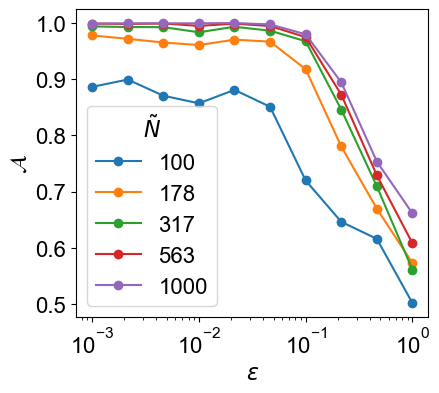

In [30]:
plt.figure(figsize=(10,4))

plt.subplot(121)
for i in range(len(num_repeats_list)):
    plt.plot(noise_list2,auc_list2[i,:],'o-')

plt.xscale('log')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathcal{A}$')
plt.legend(num_repeats_list,title=r'$\tilde N$')

In [31]:
t1 = {}
t1["noise_list"] = noise_list2
t1["auc_list"]   = auc_list2
np.save("data/kuramoto_network_noisy_auc_noise_withError",t1)

In [162]:
t2 = {}
t2["noise_list"] = noise_list
t2["auc_list"]   = auc_list
np.save("data/kuramoto_network_noisy_auc_noise_1",t2)

## Read Linear network data:

In [9]:
t_linear = np.load("data/linear_network_noisy_auc_noise3.npy",allow_pickle= True).item()

In [34]:
t_linear["noise_list"]

NameError: name 't_linear' is not defined

In [69]:
t_linear_new = np.load("data/linear_network_noisy_auc_noise3_small_dt_small_T_withError.npy",allow_pickle= True).item()

In [33]:
t_KM = np.load("data/kuramoto_network_noisy_auc_noise_withError.npy",allow_pickle= True).item()

In [35]:
t_KM["noise_list"]**2

array([1.00000000e-06, 4.64158883e-06, 2.15443469e-05, 1.00000000e-04,
       4.64158883e-04, 2.15443469e-03, 1.00000000e-02, 4.64158883e-02,
       2.15443469e-01, 1.00000000e+00])

## Plot in Leonhard style:

In [37]:
from matplotlib import colors
from config.plot_config import *
import matplotlib as mpl

Loading plot config <matplotlib.colors.ListedColormap object at 0x7f6b0c4f5ac0>


Text(-0.15, 0.9, '$\\textbf{(b)}$')

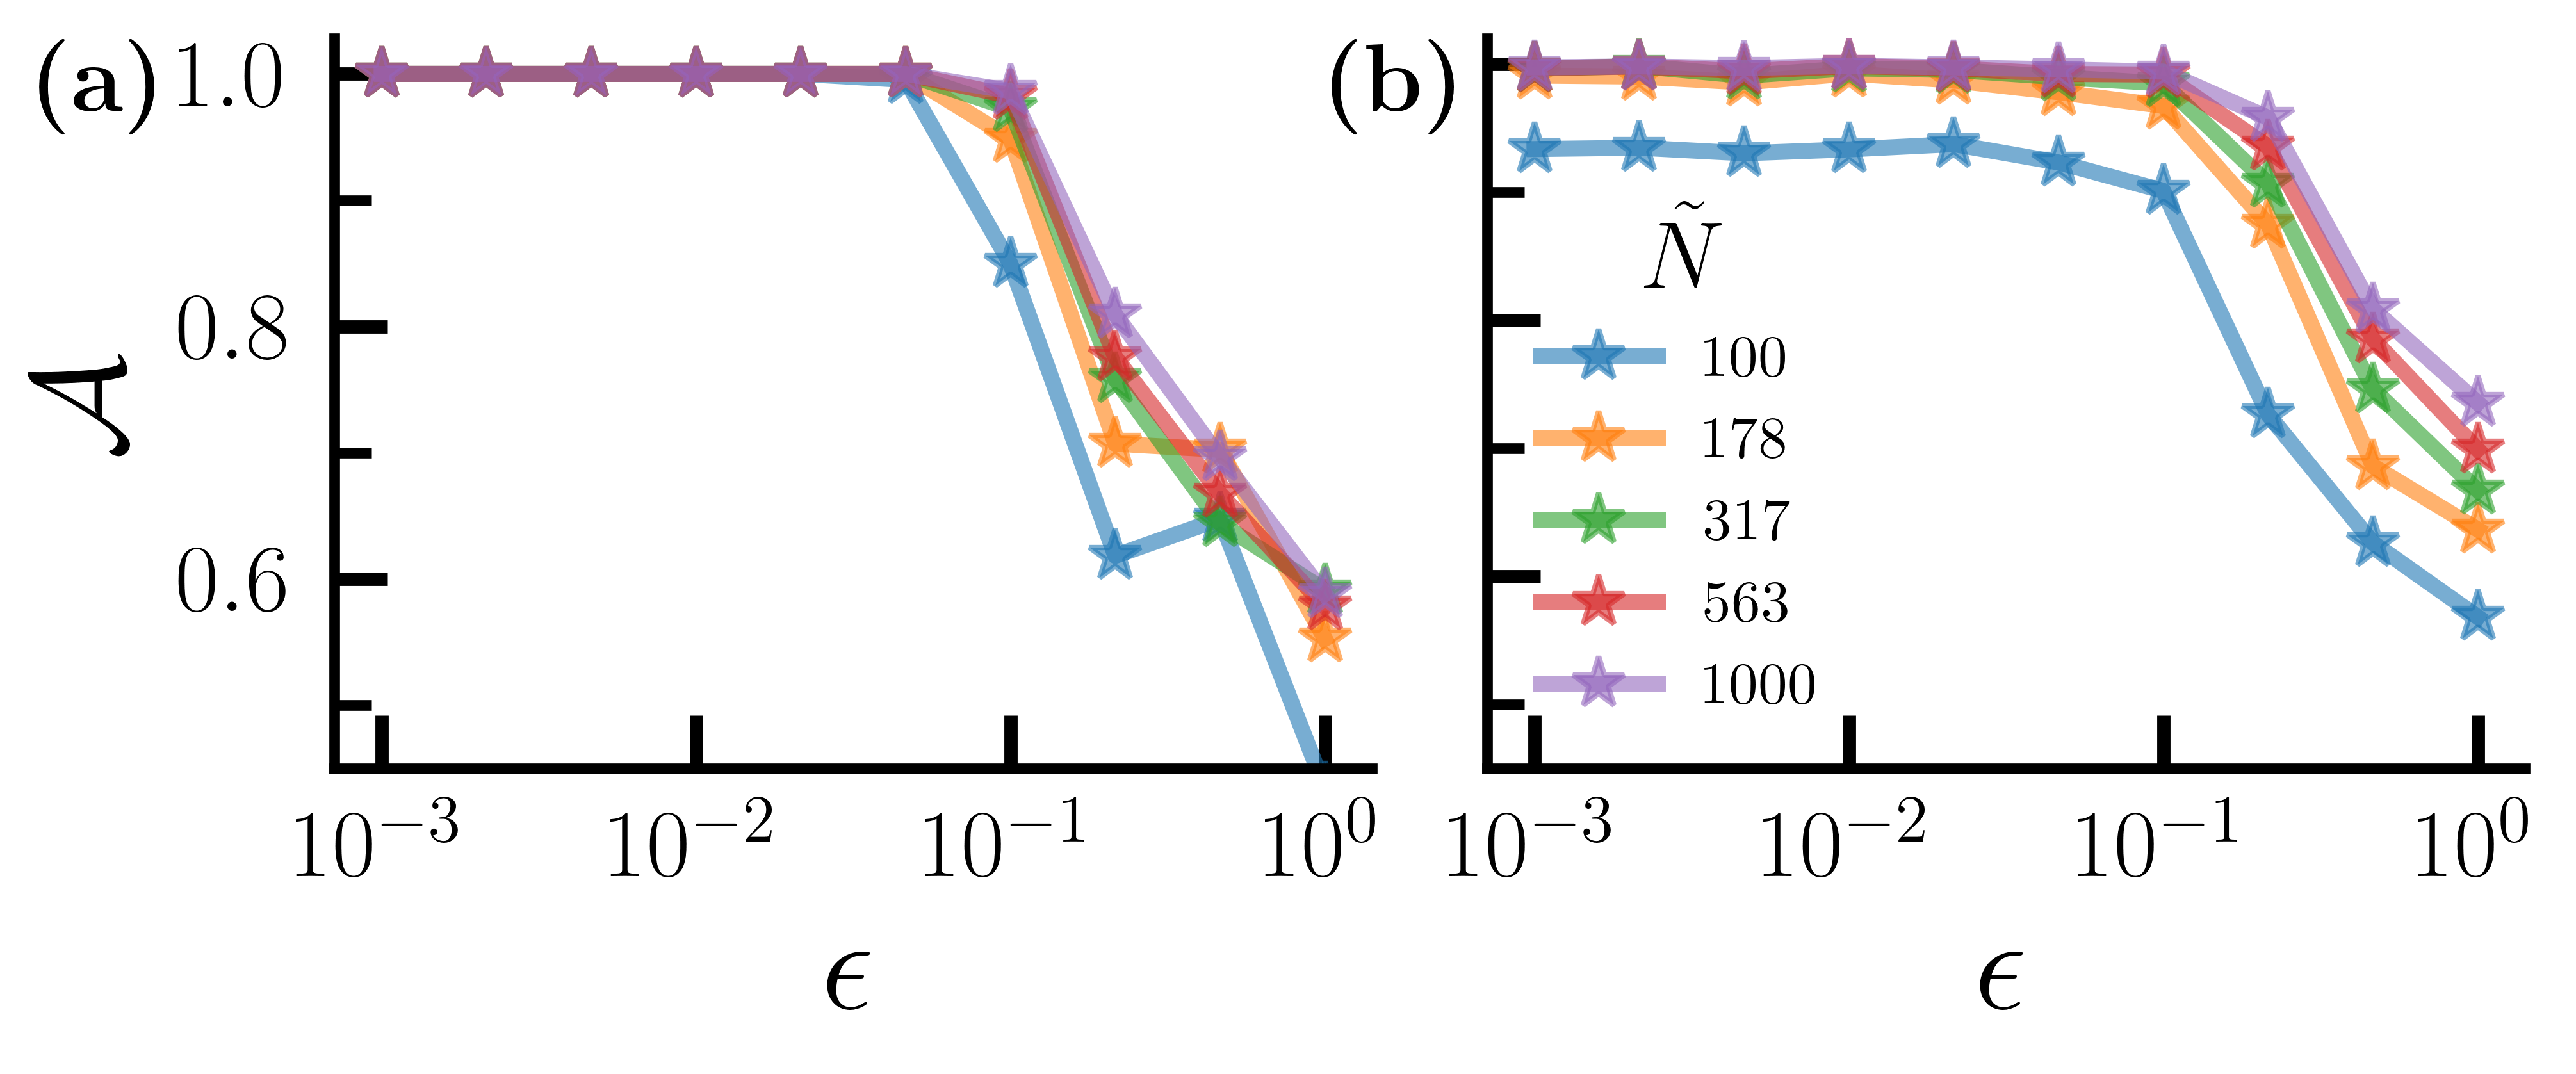

In [173]:
fig = plt.figure(figsize=(6., 2.), dpi=600)#(figsize=(7, 2.5))
dx_a, dy_a = .45, .95
x_pos = .55
y_pos = .05

alpha_m = .6

ax1 = fig.add_axes([.05, y_pos, dx_a, dy_a])
ax2 = fig.add_axes([x_pos, y_pos, dx_a, dy_a])

marker_list = ['*', 'o']
marker = '*'

for i in range(len(num_repeats_list)):
    ax1.plot(t_linear["noise_list"],t_linear["auc_list"][i,:], marker=marker,alpha=alpha_m, color=COLORS(i))#,ls=(0,(1,1)))

ax1.set_xscale('log')
#ax1.legend(num_repeats_list,bbox_to_anchor=(1.3, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=10)#, fontsize=16)

ax1.set_ylim(ymin=0.45)
ax1.set_ylabel(s_auc)
ax1.set_xlabel(r'$\epsilon$')
#ax1.legend(num_repeats_list,frameon=True, framealpha=.2,fontsize=10,title=s_N_exp)

ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#ax1.xaxis.set_minor_locator(mpl.ticker.NullLocator())
#ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax1.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, subs=(1.0,),numticks=4))

### Second Plot ###

marker = '*'

for i in range(len(num_repeats_list)):
    ax2.plot(noise_list2,auc_list2[i,:], marker=marker,alpha=alpha_m, color=COLORS(i))#,ls=(0,(1,1)))

ax2.set_xscale('log')
#ax2.legend(num_repeats_list,bbox_to_anchor=(1.3, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=10,title=s_N_exp)#, fontsize=16)

ax2.set_ylim(ymin=0.45)
#ax2.set_ylabel(s_auc)
ax2.set_xlabel(r'$\epsilon$')
ax2.legend(num_repeats_list,frameon=False, framealpha=.2,fontsize=11,title=s_N_exp)

ax2.yaxis.set_tick_params(label1On=False)
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#ax2.xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, subs=(0.1,)))
#ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax2.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, subs=(1.0,),numticks=4))

ax1.text(-0.285, .9, r'$\textbf{(a)}$', transform=ax1.transAxes, )
ax2.text(-0.15, .9, r'$\textbf{(b)}$', transform=ax2.transAxes, )


Text(-0.15, 0.9, '$\\textbf{(b)}$')

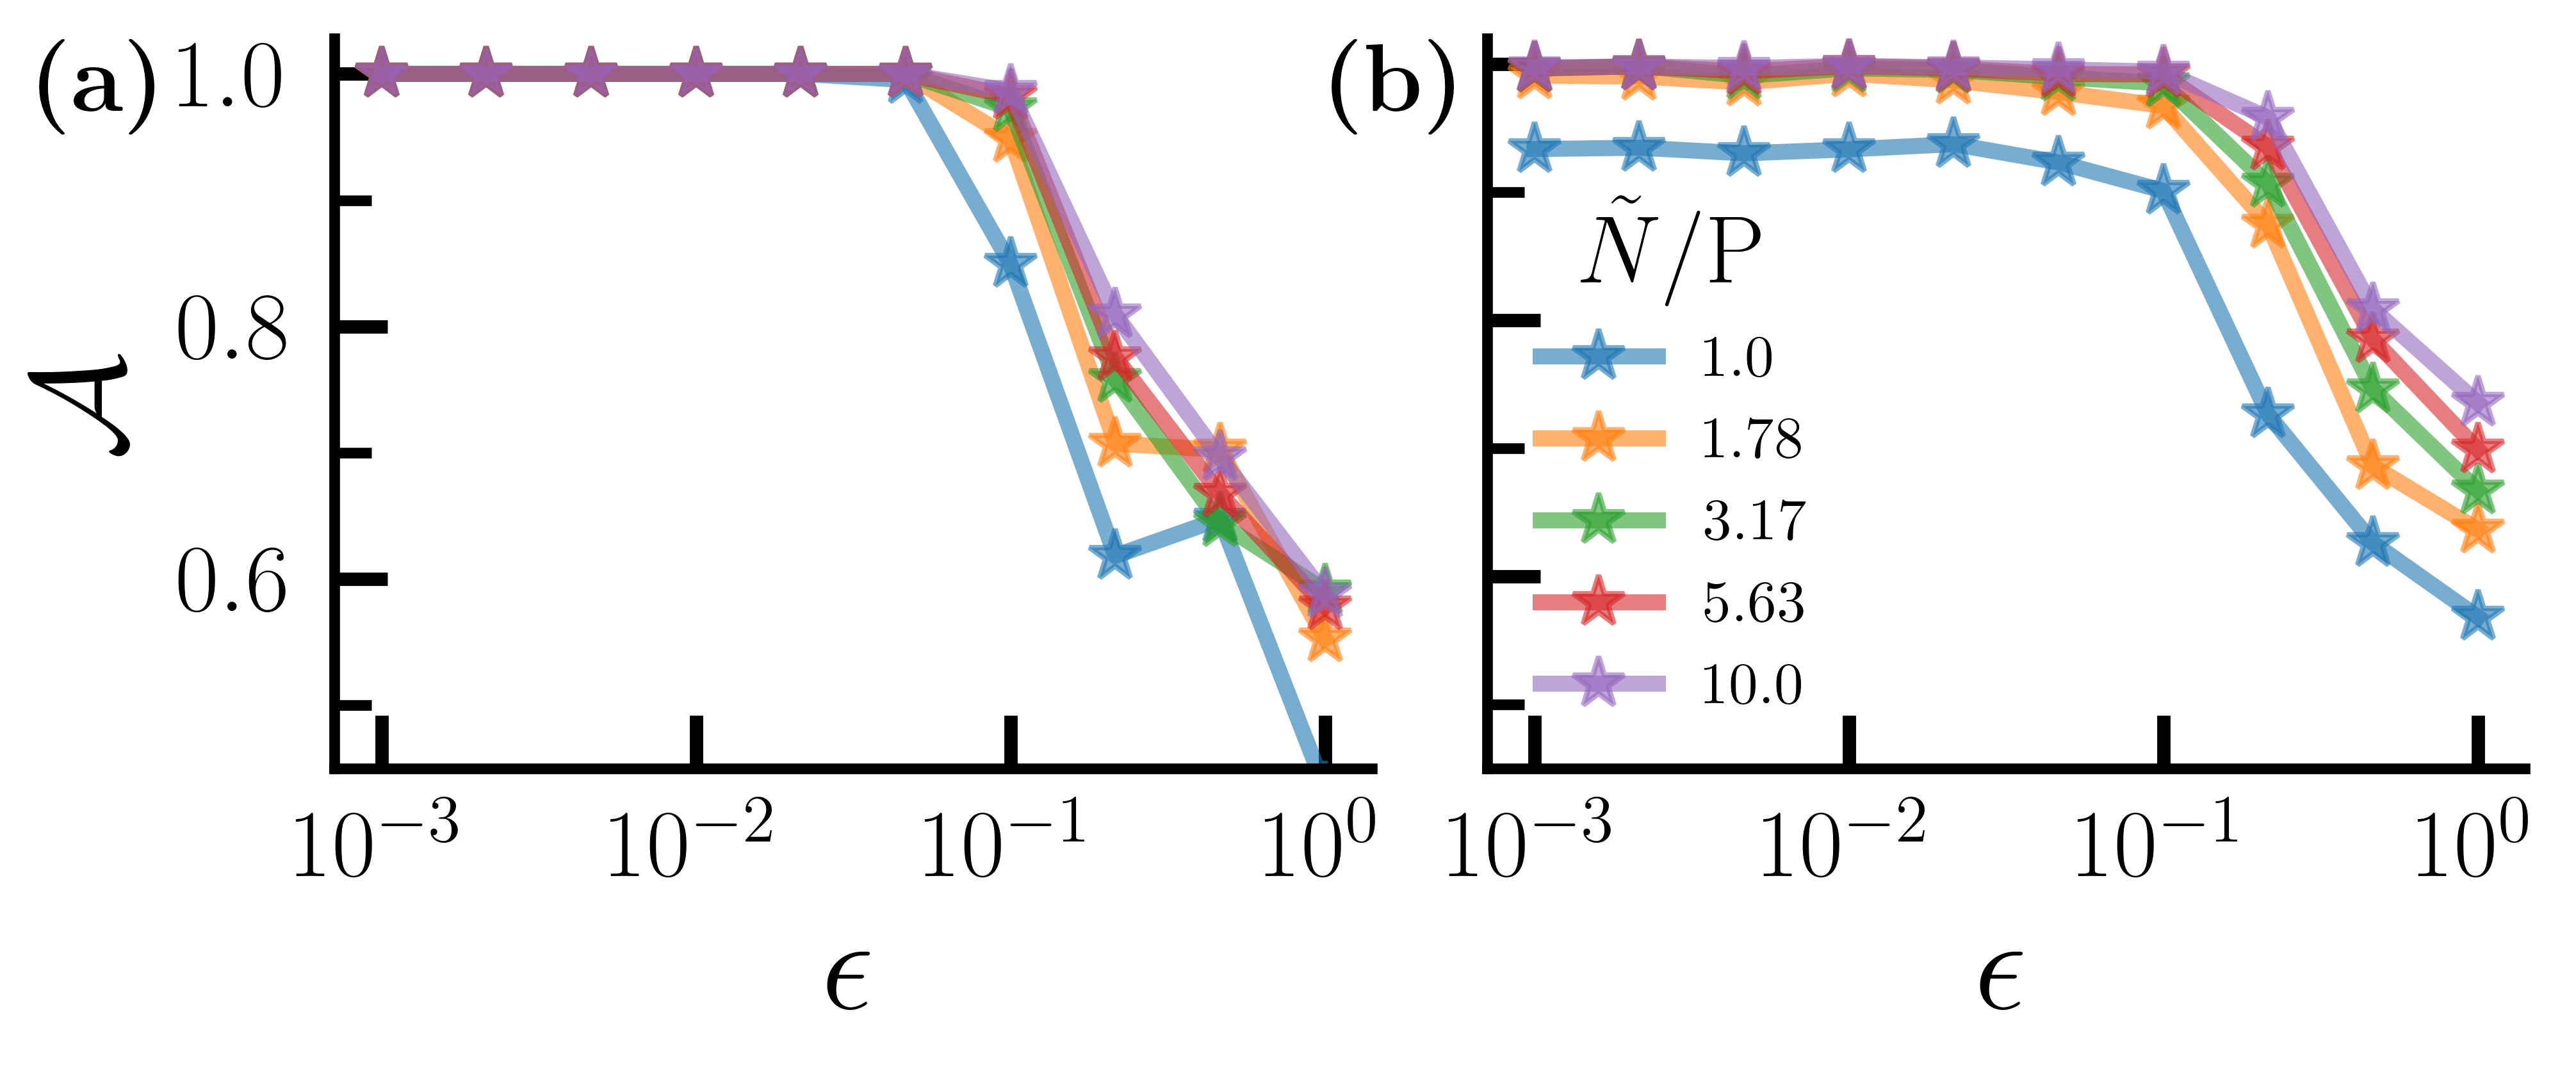

In [174]:
fig = plt.figure(figsize=(6., 2.), dpi=600)#(figsize=(7, 2.5))
dx_a, dy_a = .45, .95
x_pos = .55
y_pos = .05

alpha_m = .6

ax1 = fig.add_axes([.05, y_pos, dx_a, dy_a])
ax2 = fig.add_axes([x_pos, y_pos, dx_a, dy_a])

marker_list = ['*', 'o']
marker = '*'

for i in range(len(num_repeats_list)):
    ax1.plot(t_linear["noise_list"],t_linear["auc_list"][i,:], marker=marker,alpha=alpha_m, color=COLORS(i))#,ls=(0,(1,1)))

ax1.set_xscale('log')
#ax1.legend(num_repeats_list,bbox_to_anchor=(1.3, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=10)#, fontsize=16)

ax1.set_ylim(ymin=0.45)
ax1.set_ylabel(s_auc)
ax1.set_xlabel(r'$\epsilon$')
#ax1.legend(num_repeats_list,frameon=True, framealpha=.2,fontsize=10,title=s_N_exp)

ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#ax1.xaxis.set_minor_locator(mpl.ticker.NullLocator())
#ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax1.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, subs=(1.0,),numticks=4))

### Second Plot ###

marker = '*'

for i in range(len(num_repeats_list)):
    ax2.plot(noise_list2,auc_list2[i,:], marker=marker,alpha=alpha_m, color=COLORS(i))#,ls=(0,(1,1)))

ax2.set_xscale('log')
#ax2.legend(num_repeats_list,bbox_to_anchor=(1.3, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=10,title=s_N_exp)#, fontsize=16)

ax2.set_ylim(ymin=0.45)
#ax2.set_ylabel(s_auc)
ax2.set_xlabel(r'$\epsilon$')
ax2.legend(num_repeats_list/100,frameon=False, framealpha=.2,fontsize=11,title=s_N_exp+"/P")

ax2.yaxis.set_tick_params(label1On=False)
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#ax2.xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, subs=(0.1,)))
#ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax2.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, subs=(1.0,),numticks=4))

ax1.text(-0.285, .9, r'$\textbf{(a)}$', transform=ax1.transAxes, )
ax2.text(-0.15, .9, r'$\textbf{(b)}$', transform=ax2.transAxes, )


## Calculate the MP values of the basis functions (the natural frequency):

In [180]:
#Noise Parameters:
num_basis = num_subnw+1
A  = []

#for n in range(len(noise_list2)):

#    for n_reps in range(len(num_repeats_list)):

n = 0
n_reps = -1

d1  = utilities.design_matrix_KM(soln2[n,:int(T/deltaT)*num_repeats_list[n_reps],0:num_subnw])

for i in range(num_subnw):
    A.append(np.diag(alpha_opt2[n_reps,n,i]*np.ones(num_basis)) + beta_opt2[n_reps,n,i]*np.matmul(d1.T,d1))

W_mp          = np.zeros([num_basis,num_subnw])
predicted     = np.zeros([len(obs_noise2[n,:int(T/deltaT)*num_repeats_list[n_reps],0]),num_subnw])
predicted_var = np.zeros([len(obs_noise2[n,:int(T/deltaT)*num_repeats_list[n_reps],0]),num_subnw])

for i in range(num_subnw):
    W_mp[:,i]          = beta_opt2[n_reps,n,i]*np.matmul(np.linalg.inv(A[i]),np.matmul(d1.T,obs_noise2[n,:int(T/deltaT)*num_repeats_list[n_reps],i]))
    predicted[:,i]     = np.matmul(W_mp[:,i],d1.T)
    #for j in range(len(obs)):
    #    predicted_var[j,i] = np.matmul(basis(soln[j,0:3]).T,np.matmul(np.linalg.inv(A[i]),basis(soln[j,0:3]))) + 1./beta_opt[i]

Text(0, 0.5, '$\\Omega$')

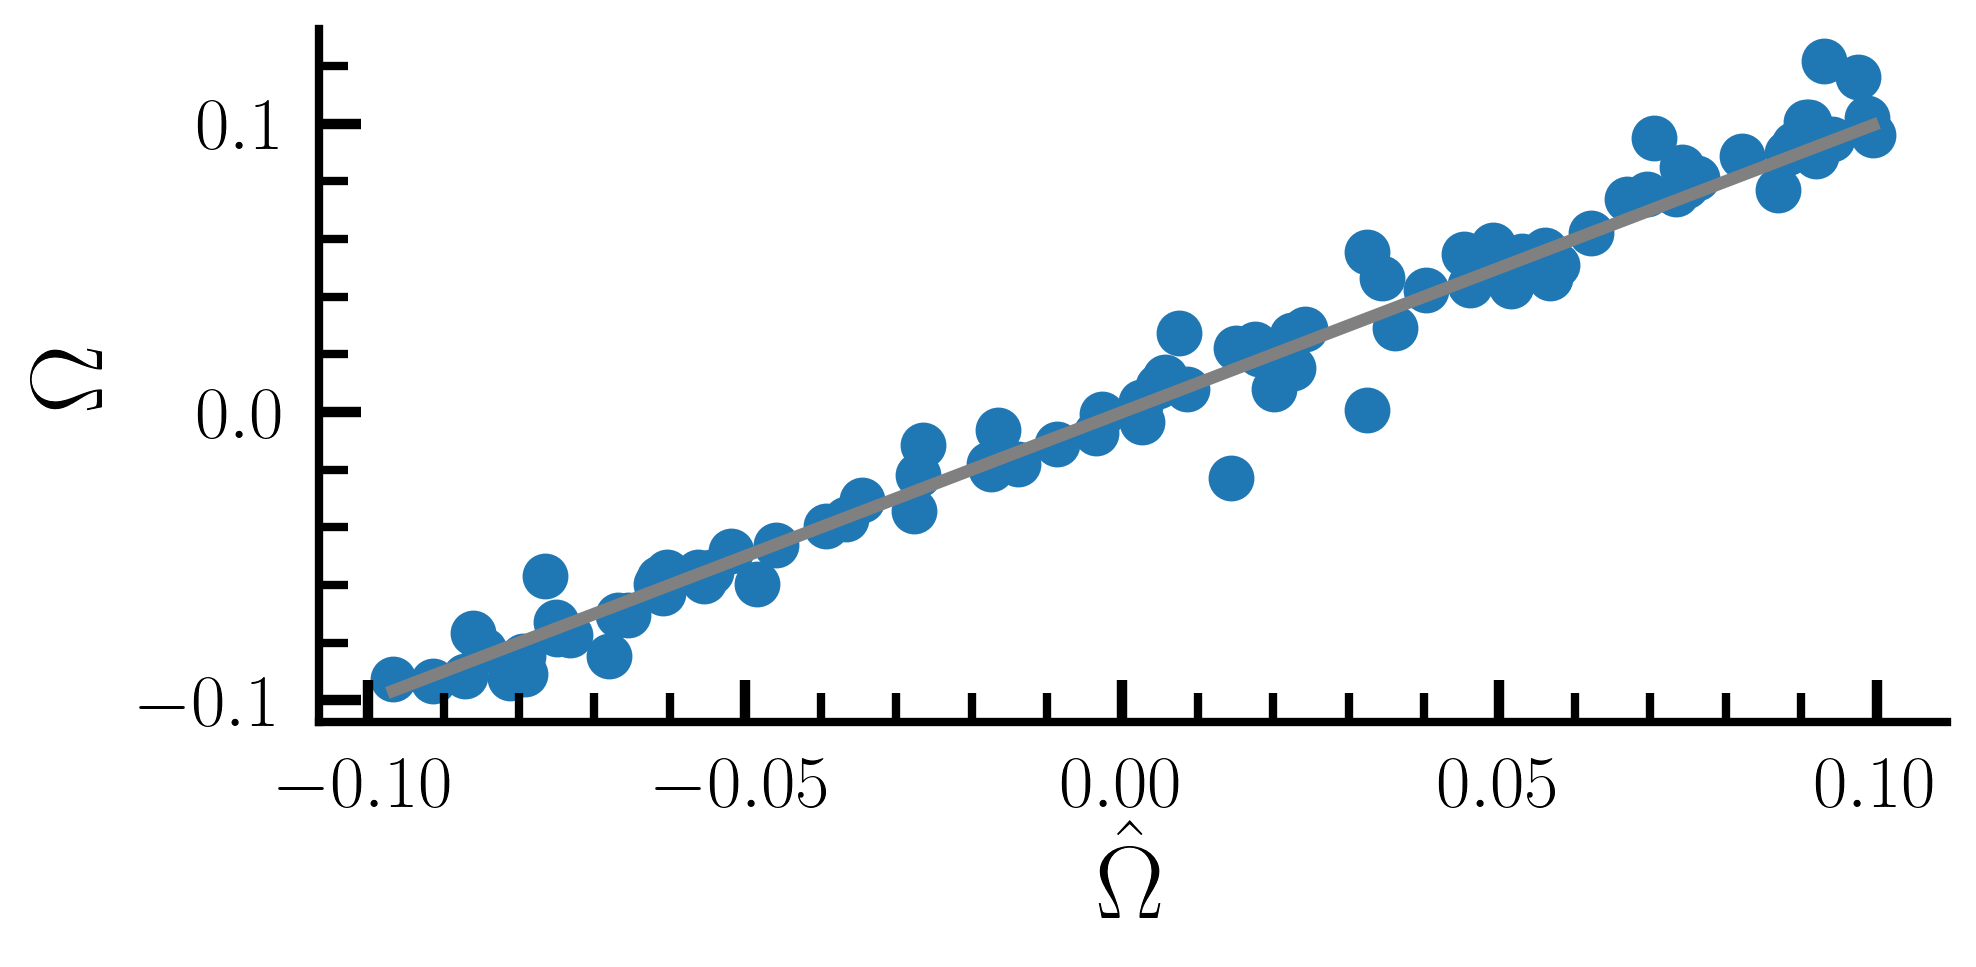

In [191]:
plt.scatter(Ω[:num_subnw],[W_mp[0,i] for i in range(num_subnw)])
plt.plot(np.linspace(min(Ω),max(Ω)),np.linspace(min(Ω),max(Ω)),color='gray')
plt.xlabel(r'$\hat \Omega$')
plt.ylabel(r'$\Omega$')

In [39]:
#Noise Parameters:
num_basis = num_subnw+1
A  = []

#for n in range(len(noise_list2)):

#    for n_reps in range(len(num_repeats_list)):

n = 4
n_reps = -1

d1  = utilities.design_matrix_KM(soln2[n,:int(T/deltaT)*num_repeats_list[n_reps],0:num_subnw])

for i in range(num_subnw):
    A.append(np.diag(alpha_opt2[n_reps,n,i]*np.ones(num_basis)) + beta_opt2[n_reps,n,i]*np.matmul(d1.T,d1))

W_mp          = np.zeros([num_basis,num_subnw])
predicted     = np.zeros([len(obs_noise2[n,:int(T/deltaT)*num_repeats_list[n_reps],0]),num_subnw])
predicted_var = np.zeros([len(obs_noise2[n,:int(T/deltaT)*num_repeats_list[n_reps],0]),num_subnw])

for i in range(num_subnw):
    W_mp[:,i]          = beta_opt2[n_reps,n,i]*np.matmul(np.linalg.inv(A[i]),np.matmul(d1.T,obs_noise2[n,:int(T/deltaT)*num_repeats_list[n_reps],i]))
    predicted[:,i]     = np.matmul(W_mp[:,i],d1.T)
    #for j in range(len(obs)):
    #    predicted_var[j,i] = np.matmul(basis(soln[j,0:3]).T,np.matmul(np.linalg.inv(A[i]),basis(soln[j,0:3]))) + 1./beta_opt[i]

Text(0, 0.5, '$\\Omega$')

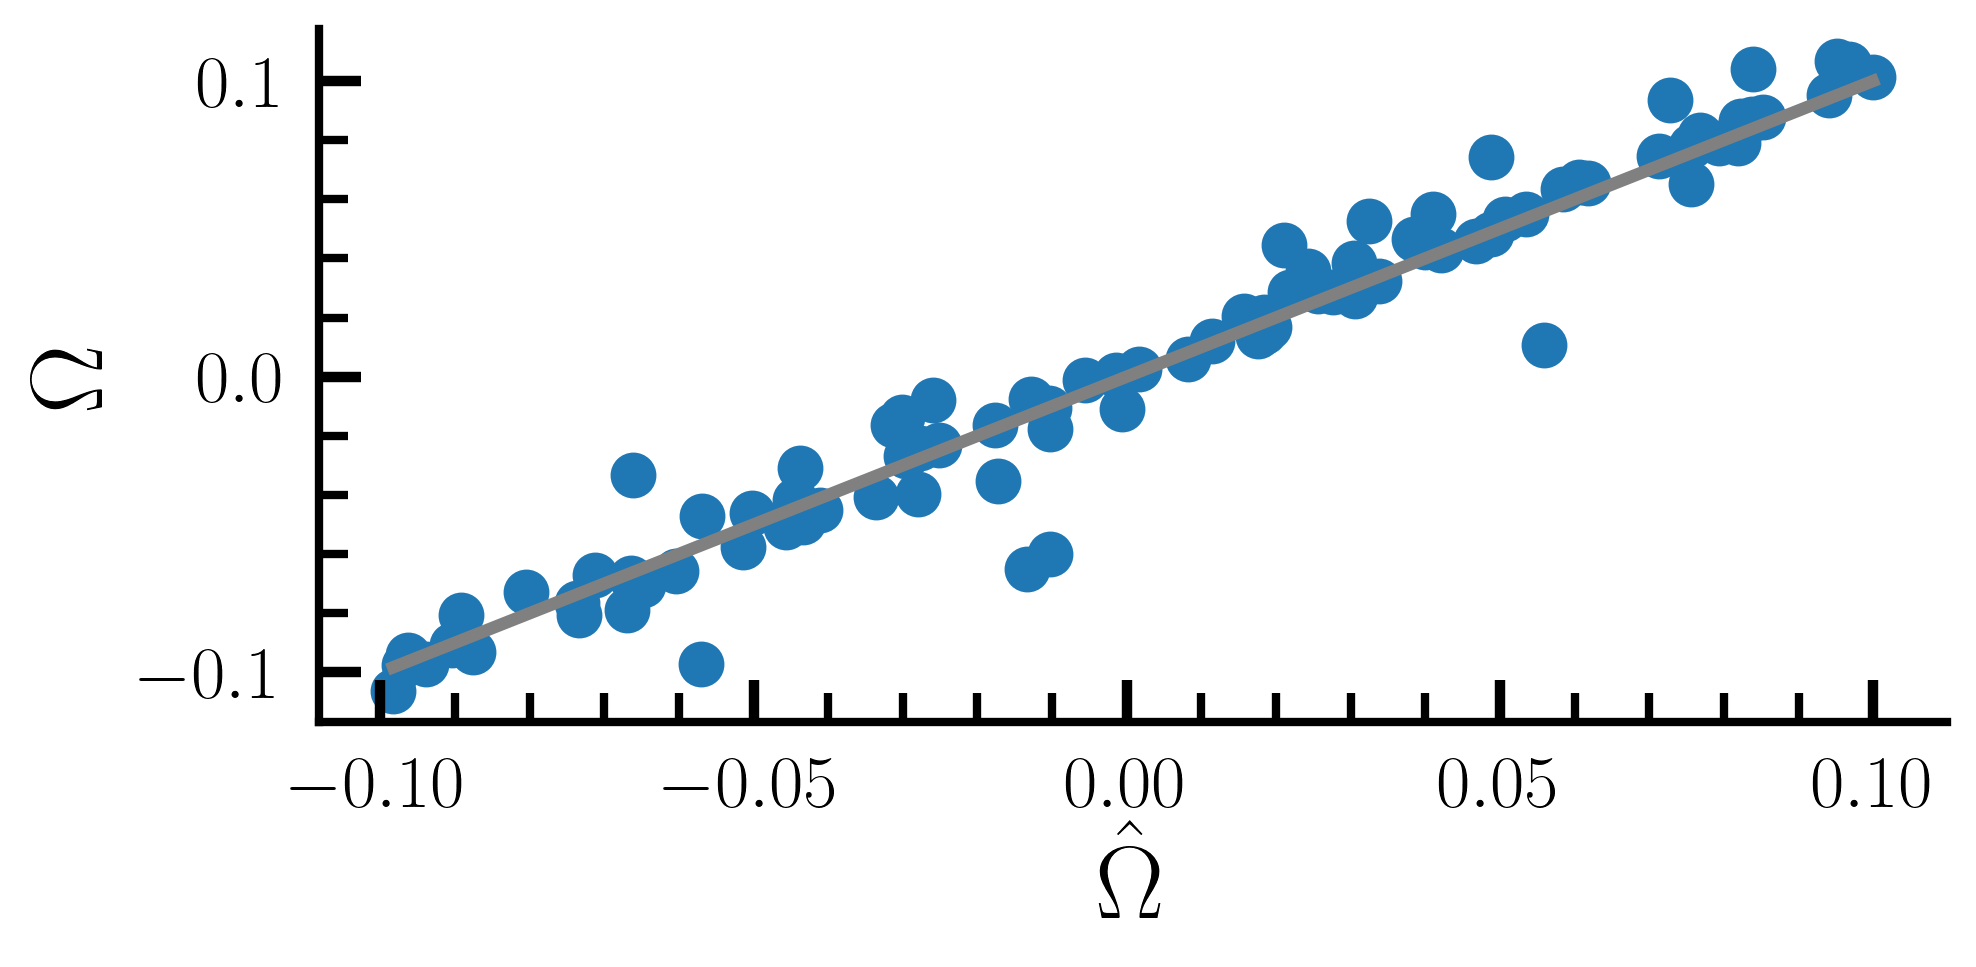

In [44]:
plt.scatter(Ω[:num_subnw],[W_mp[0,i] for i in range(num_subnw)])
plt.plot(np.linspace(min(Ω),max(Ω)),np.linspace(min(Ω),max(Ω)),color='gray')
plt.xlabel(r'$\hat \Omega$')
plt.ylabel(r'$\Omega$')

In [198]:
print('Noise level = ', noise_list2[n])
num_repeats_list[n_reps]

Noise level =  0.021544346900318832


1000

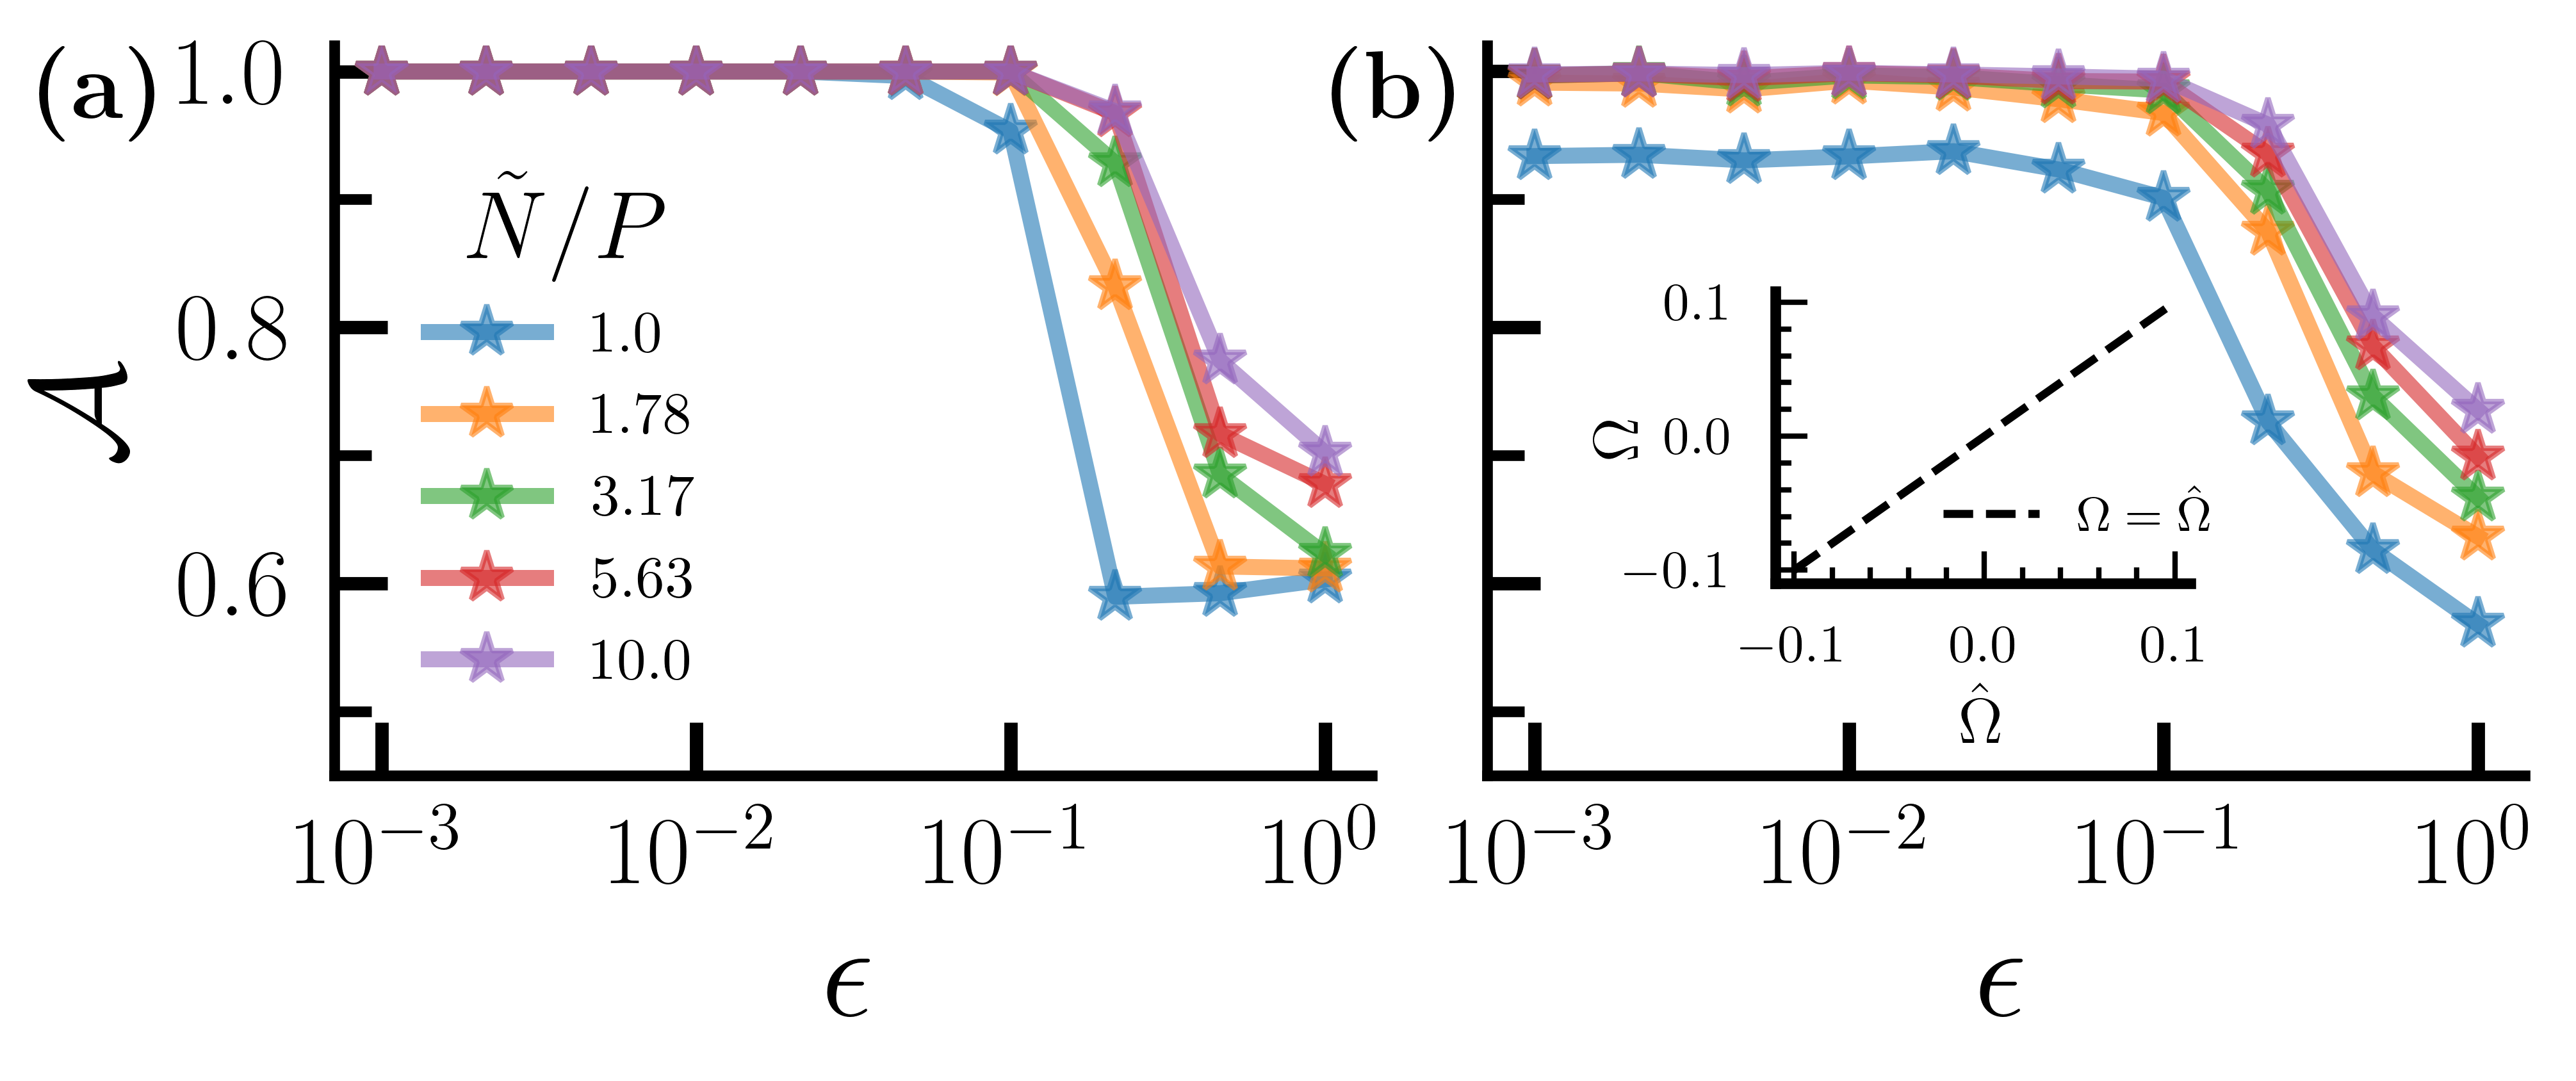

In [25]:
fig = plt.figure(figsize=(6., 2.), dpi=600)#(figsize=(7, 2.5))
dx_a, dy_a = .45, .95
x_pos = .55
y_pos = .05

alpha_m = .6

ax1 = fig.add_axes([.05, y_pos, dx_a, dy_a])
ax2 = fig.add_axes([x_pos, y_pos, dx_a, dy_a])

marker_list = ['*', 'o']
marker = '*'

for i in range(len(num_repeats_list)):
    ax1.plot(t_linear_new["noise_list"],t_linear_new["auc_list"][i,:], marker=marker,alpha=alpha_m, color=COLORS(i))#,ls=(0,(1,1)))

ax1.set_xscale('log')
#ax1.legend(num_repeats_list,bbox_to_anchor=(1.3, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=10)#, fontsize=16)

ax1.set_ylim(ymin=0.45)
ax1.set_ylabel(s_auc)
ax1.set_xlabel(r'$\epsilon$')
#ax1.legend(num_repeats_list,frameon=True, framealpha=.2,fontsize=10,title=s_N_exp)

ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#ax1.xaxis.set_minor_locator(mpl.ticker.NullLocator())
#ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax1.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, subs=(1.0,),numticks=4))

### Second Plot ###

marker = '*'

for i in range(len(num_repeats_list)):
    ax2.plot(t_KM["noise_list"],t_KM["auc_list"][i,:], marker=marker,alpha=alpha_m, color=COLORS(i))#,ls=(0,(1,1)))

ax2.set_xscale('log')
#ax2.legend(num_repeats_list,bbox_to_anchor=(1.3, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=10,title=s_N_exp)#, fontsize=16)

ax2.set_ylim(ymin=0.45)
#ax2.set_ylabel(s_auc)
ax2.set_xlabel(r'$\epsilon$')
ax1.legend(num_repeats_list/100,frameon=False, framealpha=.2,fontsize=11,title=s_N_exp+r"$/P$",bbox_to_anchor=(.4, 0.9),loc=1,)

ax2.yaxis.set_tick_params(label1On=False)
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#ax2.xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, subs=(0.1,)))
#ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax2.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, subs=(1.0,),numticks=4))

ax1.text(-0.285, .9, r'$\textbf{(a)}$', transform=ax1.transAxes, )
ax2.text(-0.15, .9, r'$\textbf{(b)}$', transform=ax2.transAxes, )

ax3 = fig.add_axes([x_pos+0.125, y_pos+0.25, dx_a/(2.5), dy_a/(2.5)])
#ax3.scatter(Ω[:num_subnw],[W_mp[0,i] for i in range(num_subnw)],marker='o',s=5,c=COLORS(4),alpha=alpha_m,label='_')
ax3.plot(np.linspace(min(Ω),max(Ω)),np.linspace(min(Ω),max(Ω)),color='black',linewidth=1.5,linestyle='dashed',label=r'$\Omega = \hat \Omega$')
ax3.set_xlabel(r'$\hat \Omega$',fontsize=12)
ax3.set_ylabel(r'$\Omega$',fontsize=12,labelpad=-5)

ax3.xaxis.set_tick_params(which='major', size=6, width=1, direction='in', top=False)
ax3.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in' , top=False)
ax3.yaxis.set_tick_params(which='major', size=6, width=1, direction='in', right=False)
ax3.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in' , right=False)

#ax3.xaxis.set_ticklabels()

ax3.legend(fontsize=9,bbox_to_anchor=(0.3, 0., 0.5, 0.5))
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)


/tmp/ipykernel_966500/3529648522.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax3.scatter(Ω[:num_subnw],[W_mp[0,i] for i in range(num_subnw)],marker='o',s=5,c=COLORS(4),alpha=alpha_m,label='_')


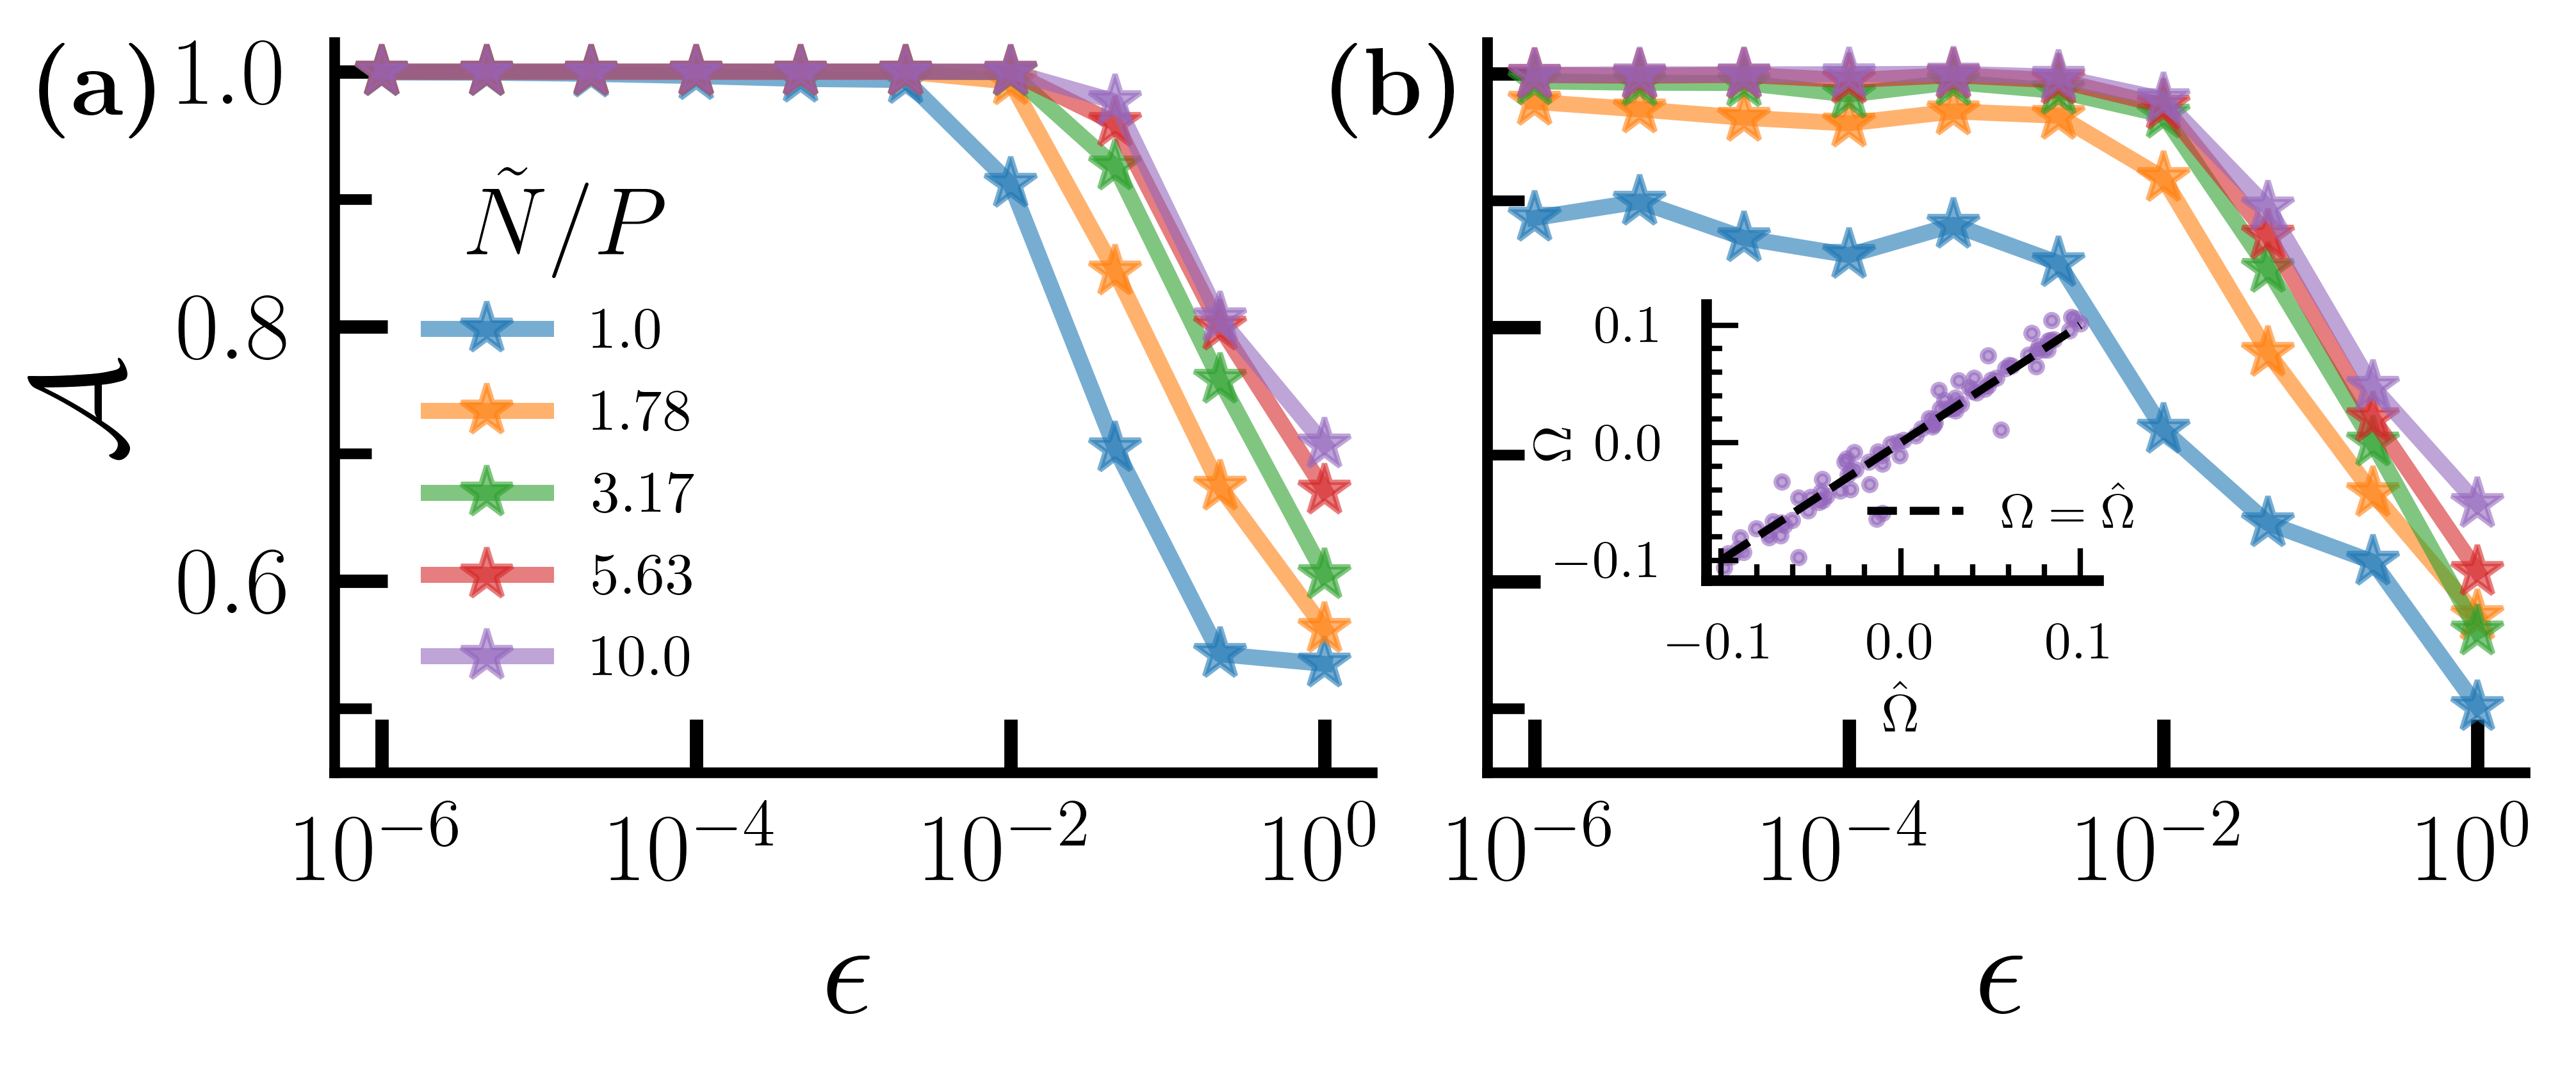

In [70]:
fig = plt.figure(figsize=(6., 2.), dpi=600)#(figsize=(7, 2.5))
dx_a, dy_a = .45, .95
x_pos = .55
y_pos = .05

alpha_m = .6

ax1 = fig.add_axes([.05, y_pos, dx_a, dy_a])
ax2 = fig.add_axes([x_pos, y_pos, dx_a, dy_a])

marker_list = ['*', 'o']
marker = '*'

for i in range(len(num_repeats_list)):
    ax1.plot(t_linear_new["noise_list"]**2,t_linear_new["auc_list"][i,:], marker=marker,alpha=alpha_m, color=COLORS(i))#,ls=(0,(1,1)))

ax1.set_xscale('log')
#ax1.legend(num_repeats_list,bbox_to_anchor=(1.3, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=10)#, fontsize=16)

ax1.set_ylim(ymin=0.45)
ax1.set_ylabel(s_auc)
ax1.set_xlabel(r'$\epsilon$')
#ax1.legend(num_repeats_list,frameon=True, framealpha=.2,fontsize=10,title=s_N_exp)

ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#ax1.xaxis.set_minor_locator(mpl.ticker.NullLocator())
#ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax1.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, subs=(1.0,),numticks=5))

### Second Plot ###

marker = '*'

for i in range(len(num_repeats_list)):
    ax2.plot(t_KM["noise_list"]**2,t_KM["auc_list"][i,:], marker=marker,alpha=alpha_m, color=COLORS(i))#,ls=(0,(1,1)))

ax2.set_xscale('log')
#ax2.legend(num_repeats_list,bbox_to_anchor=(1.3, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=10,title=s_N_exp)#, fontsize=16)

ax2.set_ylim(ymin=0.45)
#ax2.set_ylabel(s_auc)
ax2.set_xlabel(r'$\epsilon$')
ax1.legend(num_repeats_list/100,frameon=False, framealpha=.2,fontsize=11,title=s_N_exp+r"$/P$",bbox_to_anchor=(.4, 0.9),loc=1,)

ax2.yaxis.set_tick_params(label1On=False)
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#ax2.xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, subs=(0.1,)))
#ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax2.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, subs=(1.0,),numticks=5))

ax1.text(-0.285, .9, r'$\textbf{(a)}$', transform=ax1.transAxes, )
ax2.text(-0.15, .9, r'$\textbf{(b)}$', transform=ax2.transAxes, )

ax3 = fig.add_axes([x_pos+0.095, y_pos+0.25, dx_a/(2.65), dy_a/(2.65)])
ax3.scatter(Ω[:num_subnw],[W_mp[0,i] for i in range(num_subnw)],marker='o',s=5,c=COLORS(4),alpha=alpha_m,label='_')
ax3.plot(np.linspace(min(Ω),max(Ω)),np.linspace(min(Ω),max(Ω)),color='black',linewidth=1.5,linestyle='dashed',label=r'$\Omega = \hat \Omega$')
ax3.set_xlabel(r'$\hat \Omega$',fontsize=10)
ax3.set_ylabel(r'$\Omega$',fontsize=10,labelpad=-5)
ax3.patch.set_alpha(0)

ax3.xaxis.set_tick_params(which='major', size=6, width=1, direction='in', top=False)
ax3.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in' , top=False)
ax3.yaxis.set_tick_params(which='major', size=6, width=1, direction='in', right=False)
ax3.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in' , right=False)

#ax3.xaxis.set_ticklabels()

ax3.legend(fontsize=9,bbox_to_anchor=(0.3, 0., 0.5, 0.5))
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)

ax1.set_xlim(xmax=2,xmin=5e-7)
ax1.set_xticks([1e-6, 1e-4, 1e-2,1])

ax2.set_xlim(xmax=2,xmin=5e-7)
ax2.set_xticks([1e-6, 1e-4, 1e-2,1])


# The one above is the correct one!

In [49]:
noise_list2[4]**2

0.0004641588833612777

/tmp/ipykernel_1260722/1592741791.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax3.scatter(Ω[:num_subnw],[W_mp[0,i] for i in range(num_subnw)],marker='o',s=5,c=COLORS(4),alpha=alpha_m,label='_')


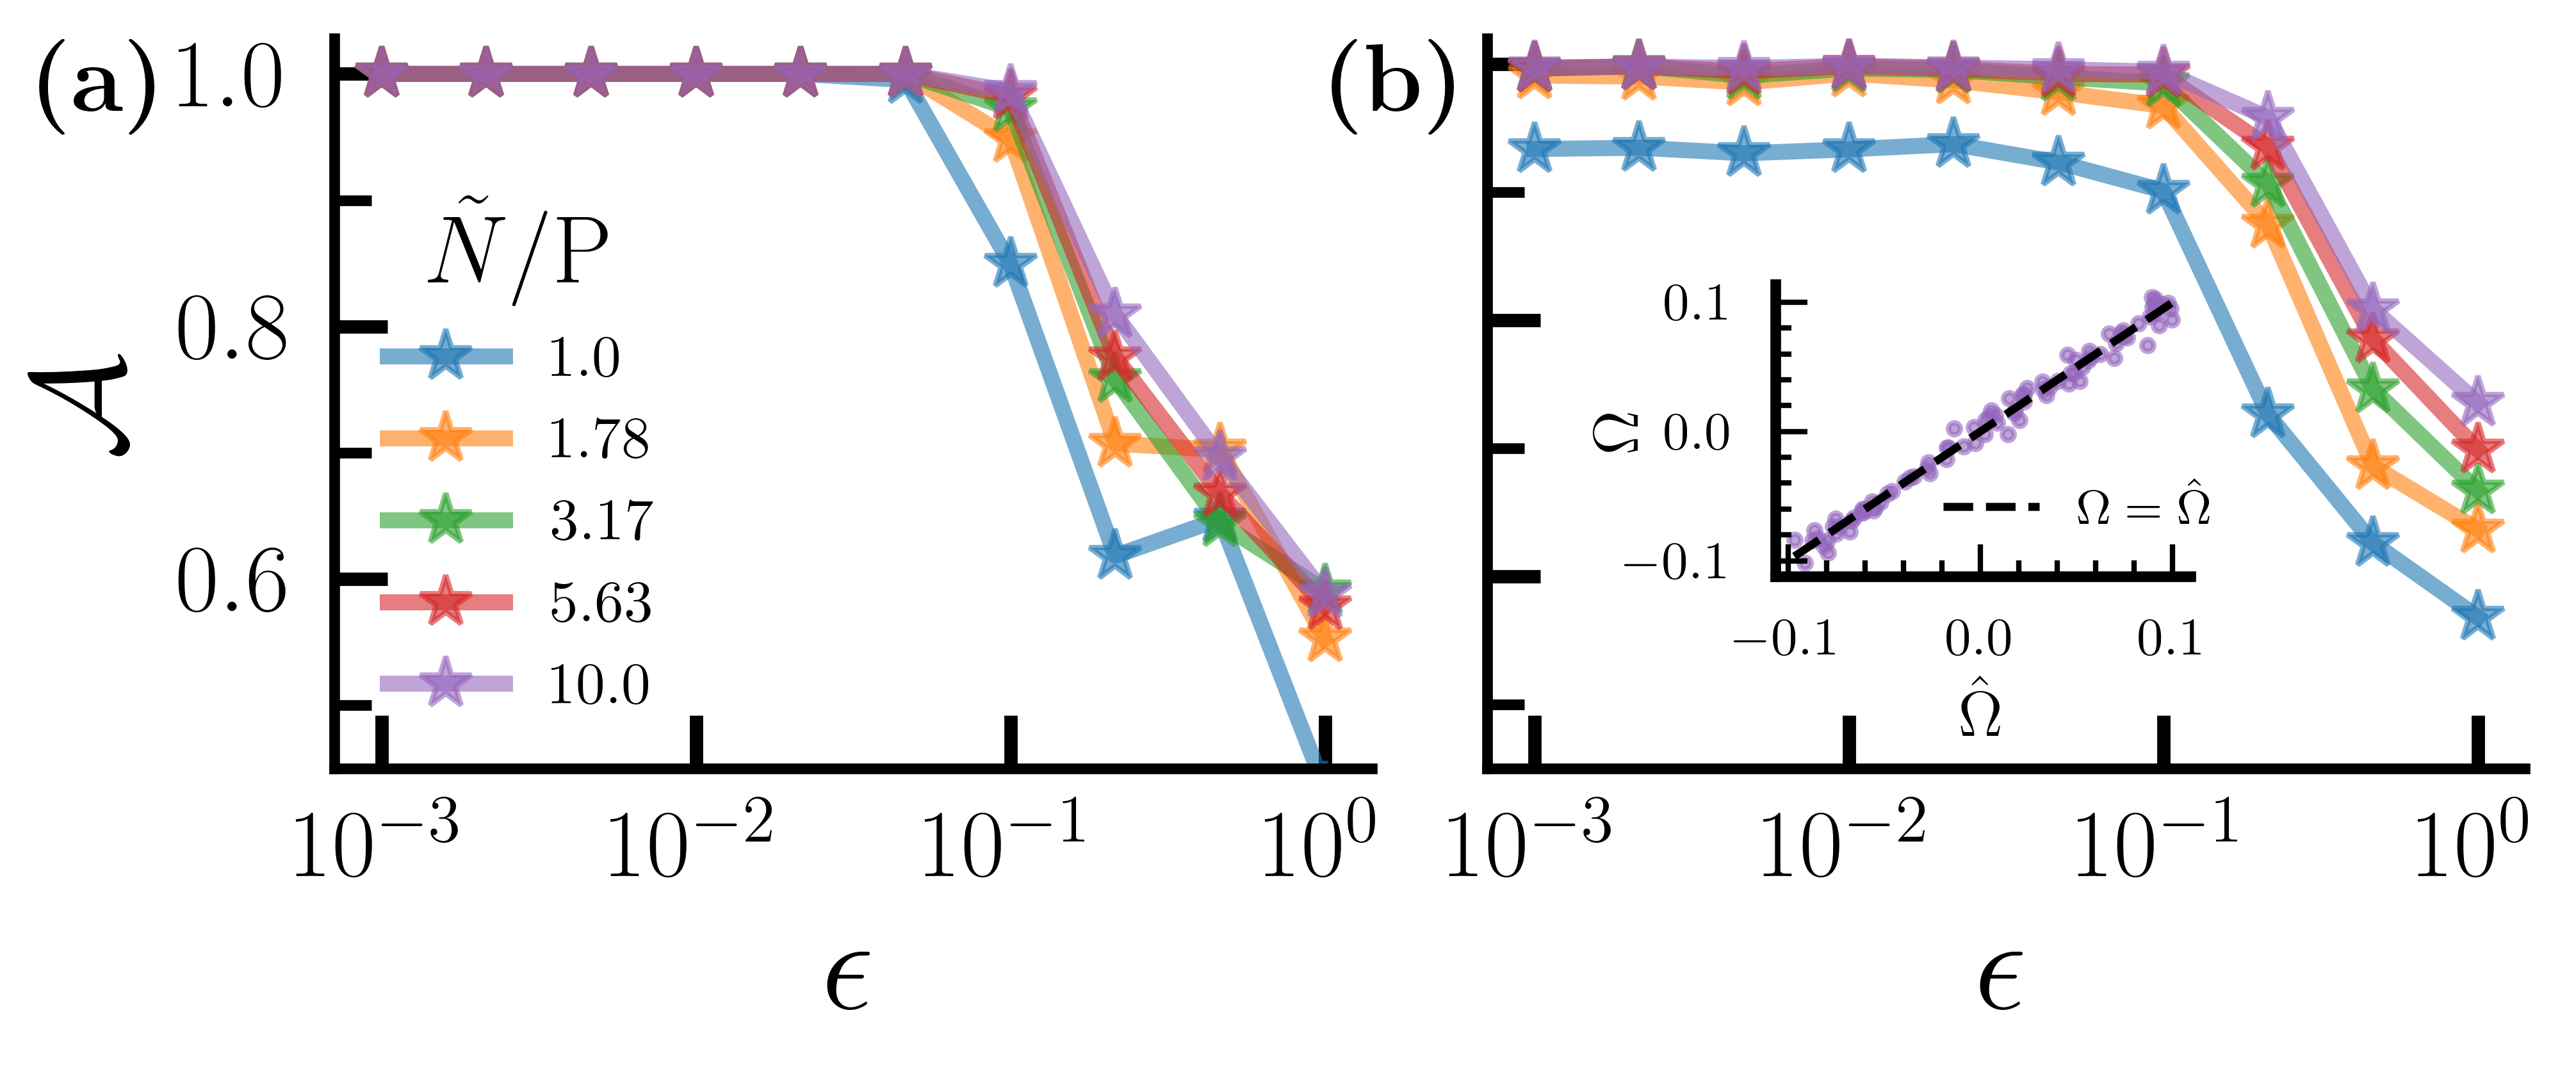

In [246]:
fig = plt.figure(figsize=(6., 2.), dpi=600)#(figsize=(7, 2.5))
dx_a, dy_a = .45, .95
x_pos = .55
y_pos = .05

alpha_m = .6

ax1 = fig.add_axes([.05, y_pos, dx_a, dy_a])
ax2 = fig.add_axes([x_pos, y_pos, dx_a, dy_a])

marker_list = ['*', 'o']
marker = '*'

for i in range(len(num_repeats_list)):
    ax1.plot(t_linear["noise_list"],t_linear["auc_list"][i,:], marker=marker,alpha=alpha_m, color=COLORS(i))#,ls=(0,(1,1)))

ax1.set_xscale('log')
#ax1.legend(num_repeats_list,bbox_to_anchor=(1.3, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=10)#, fontsize=16)

ax1.set_ylim(ymin=0.45)
ax1.set_ylabel(s_auc)
ax1.set_xlabel(r'$\epsilon$')
#ax1.legend(num_repeats_list,frameon=True, framealpha=.2,fontsize=10,title=s_N_exp)

ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#ax1.xaxis.set_minor_locator(mpl.ticker.NullLocator())
#ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax1.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, subs=(1.0,),numticks=4))

### Second Plot ###

marker = '*'

for i in range(len(num_repeats_list)):
    ax2.plot(noise_list2,auc_list2[i,:], marker=marker,alpha=alpha_m, color=COLORS(i))#,ls=(0,(1,1)))

ax2.set_xscale('log')
#ax2.legend(num_repeats_list,bbox_to_anchor=(1.3, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=10,title=s_N_exp)#, fontsize=16)

ax2.set_ylim(ymin=0.45)
#ax2.set_ylabel(s_auc)
ax2.set_xlabel(r'$\epsilon$')
ax1.legend(num_repeats_list/100,frameon=False, framealpha=.2,fontsize=11,title=s_N_exp+"/P")

ax2.yaxis.set_tick_params(label1On=False)
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#ax2.xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, subs=(0.1,)))
#ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax2.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, subs=(1.0,),numticks=4))

ax1.text(-0.285, .9, r'$\textbf{(a)}$', transform=ax1.transAxes, )
ax2.text(-0.15, .9, r'$\textbf{(b)}$', transform=ax2.transAxes, )

ax3 = fig.add_axes([x_pos+0.125, y_pos+0.25, dx_a/(2.5), dy_a/(2.5)])
ax3.scatter(Ω[:num_subnw],[W_mp[0,i] for i in range(num_subnw)],marker='o',s=5,c=COLORS(4),alpha=alpha_m,label='_')
ax3.plot(np.linspace(min(Ω),max(Ω)),np.linspace(min(Ω),max(Ω)),color='black',linewidth=1.5,linestyle='dashed',label=r'$\Omega = \hat \Omega$')
ax3.set_xlabel(r'$\hat \Omega$',fontsize=12)
ax3.set_ylabel(r'$\Omega$',fontsize=12,labelpad=-5)

ax3.xaxis.set_tick_params(which='major', size=6, width=1, direction='in', top=False)
ax3.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in' , top=False)
ax3.yaxis.set_tick_params(which='major', size=6, width=1, direction='in', right=False)
ax3.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in' , right=False)

#ax3.xaxis.set_ticklabels()

ax3.legend(fontsize=9,bbox_to_anchor=(0.3, 0., 0.5, 0.5))
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)


/tmp/ipykernel_1260722/1512187095.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax3.scatter(Ω[:num_subnw],[W_mp[0,i] for i in range(num_subnw)],marker='o',s=5,c=COLORS(4),alpha=alpha_m,label='_')


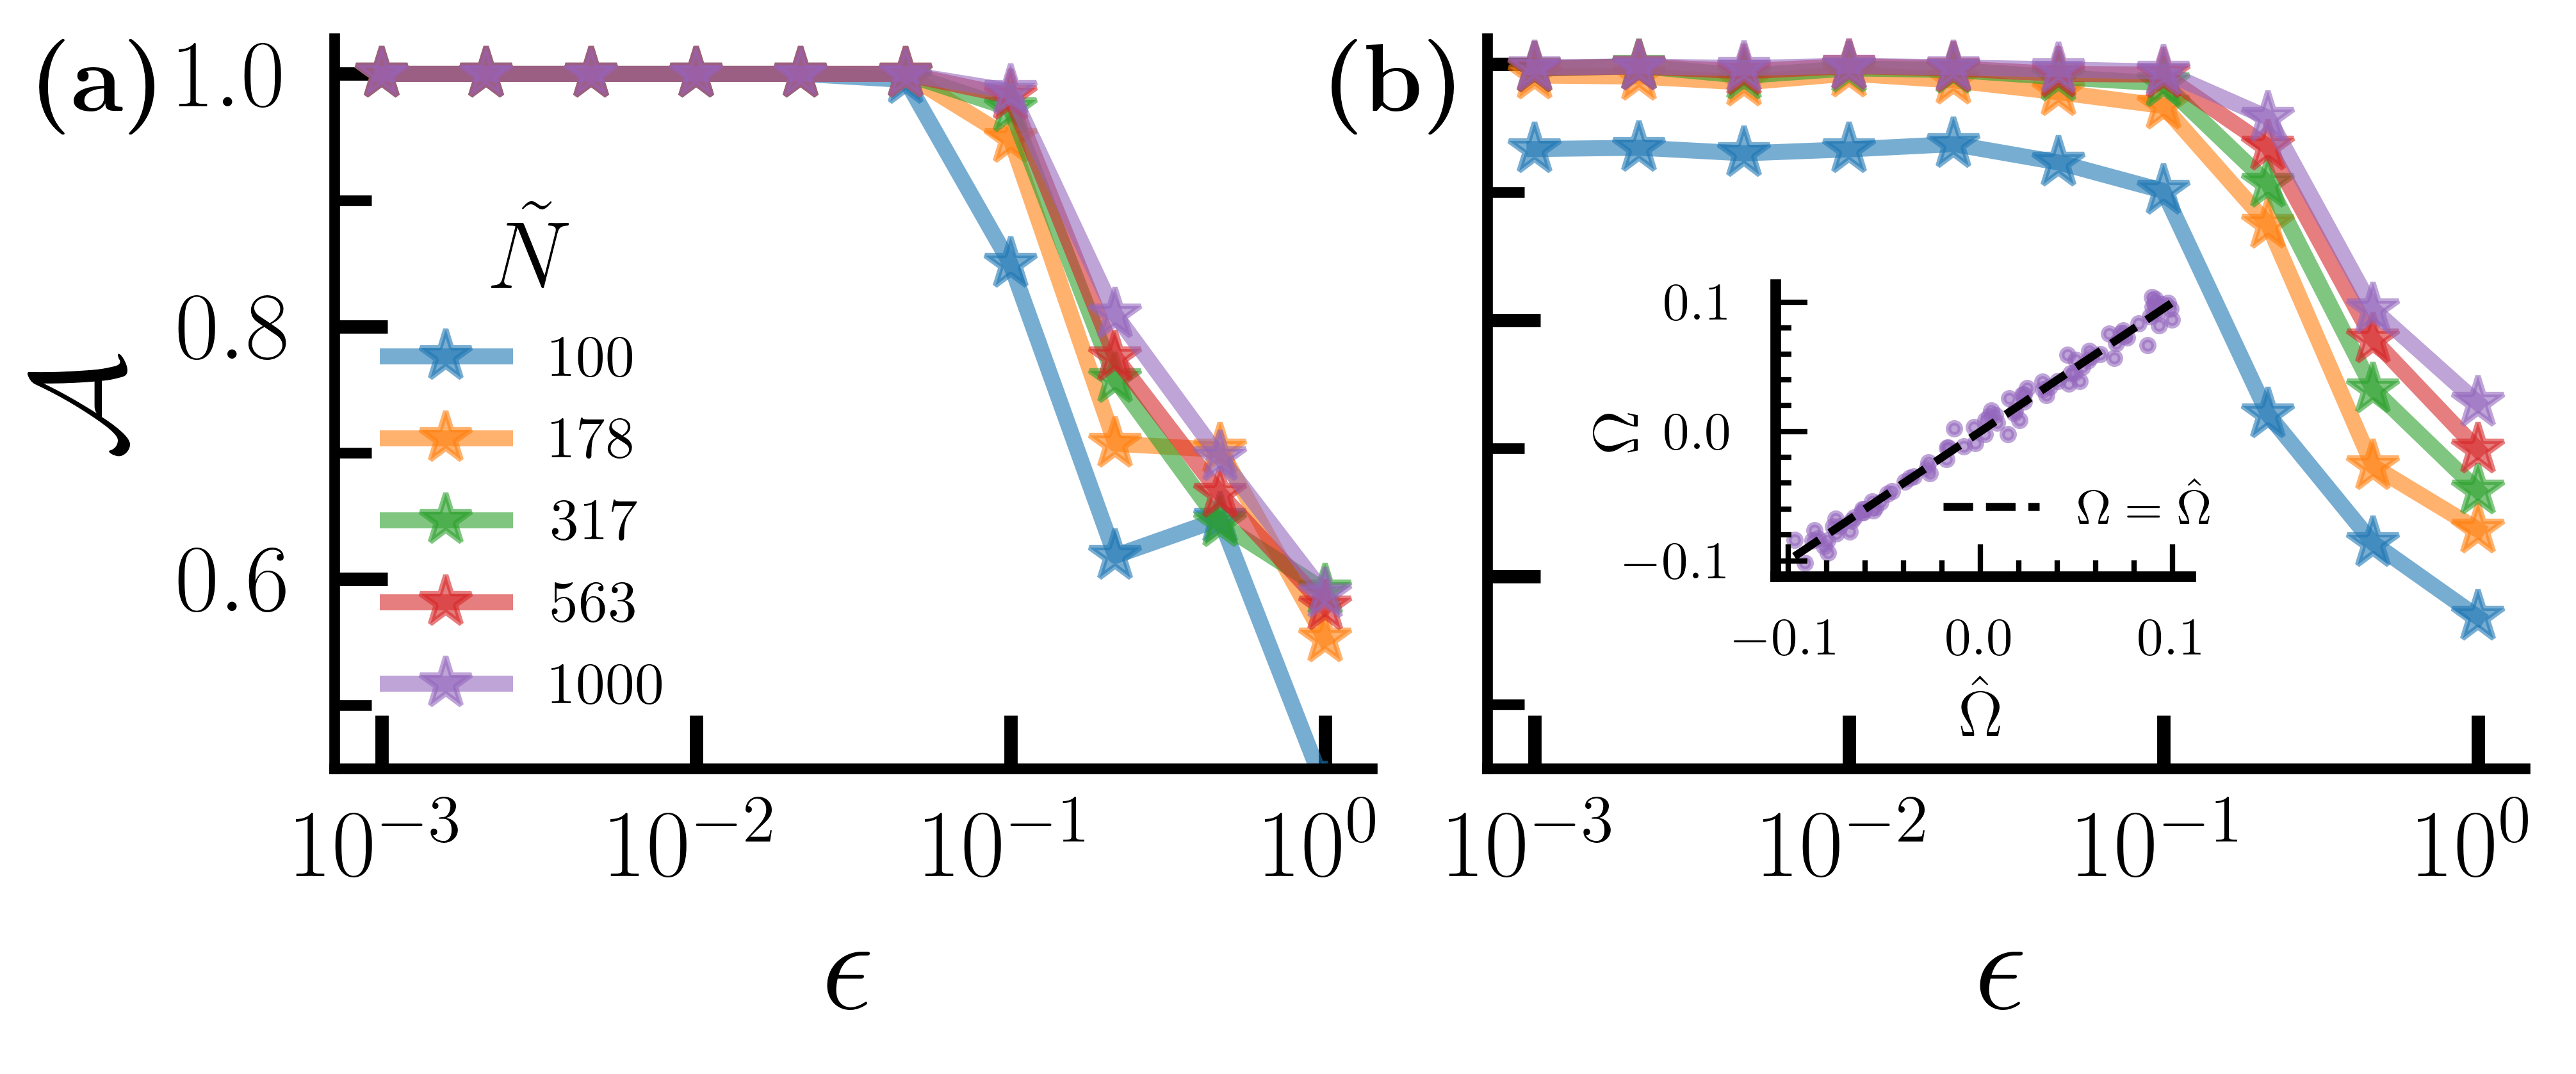

In [247]:
fig = plt.figure(figsize=(6., 2.), dpi=600)#(figsize=(7, 2.5))
dx_a, dy_a = .45, .95
x_pos = .55
y_pos = .05

alpha_m = .6

ax1 = fig.add_axes([.05, y_pos, dx_a, dy_a])
ax2 = fig.add_axes([x_pos, y_pos, dx_a, dy_a])

marker_list = ['*', 'o']
marker = '*'

for i in range(len(num_repeats_list)):
    ax1.plot(t_linear["noise_list"],t_linear["auc_list"][i,:], marker=marker,alpha=alpha_m, color=COLORS(i))#,ls=(0,(1,1)))

ax1.set_xscale('log')
#ax1.legend(num_repeats_list,bbox_to_anchor=(1.3, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=10)#, fontsize=16)

ax1.set_ylim(ymin=0.45)
ax1.set_ylabel(s_auc)
ax1.set_xlabel(r'$\epsilon$')
#ax1.legend(num_repeats_list,frameon=True, framealpha=.2,fontsize=10,title=s_N_exp)

ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#ax1.xaxis.set_minor_locator(mpl.ticker.NullLocator())
#ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax1.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, subs=(1.0,),numticks=4))

### Second Plot ###

marker = '*'

for i in range(len(num_repeats_list)):
    ax2.plot(noise_list2,auc_list2[i,:], marker=marker,alpha=alpha_m, color=COLORS(i))#,ls=(0,(1,1)))

ax2.set_xscale('log')
#ax2.legend(num_repeats_list,bbox_to_anchor=(1.3, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=10,title=s_N_exp)#, fontsize=16)

ax2.set_ylim(ymin=0.45)
#ax2.set_ylabel(s_auc)
ax2.set_xlabel(r'$\epsilon$')
ax1.legend(num_repeats_list,frameon=False, framealpha=.2,fontsize=11,title=s_N_exp)

ax2.yaxis.set_tick_params(label1On=False)
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#ax2.xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, subs=(0.1,)))
#ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax2.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, subs=(1.0,),numticks=4))

ax1.text(-0.285, .9, r'$\textbf{(a)}$', transform=ax1.transAxes, )
ax2.text(-0.15, .9, r'$\textbf{(b)}$', transform=ax2.transAxes, )

ax3 = fig.add_axes([x_pos+0.125, y_pos+0.25, dx_a/(2.5), dy_a/(2.5)])
ax3.scatter(Ω[:num_subnw],[W_mp[0,i] for i in range(num_subnw)],marker='o',s=5,c=COLORS(4),alpha=alpha_m,label='_')
ax3.plot(np.linspace(min(Ω),max(Ω)),np.linspace(min(Ω),max(Ω)),color='black',linewidth=1.5,linestyle='dashed',label=r'$\Omega = \hat \Omega$')
ax3.set_xlabel(r'$\hat \Omega$',fontsize=12)
ax3.set_ylabel(r'$\Omega$',fontsize=12,labelpad=-5)

ax3.xaxis.set_tick_params(which='major', size=6, width=1, direction='in', top=False)
ax3.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in' , top=False)
ax3.yaxis.set_tick_params(which='major', size=6, width=1, direction='in', right=False)
ax3.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in' , right=False)

#ax3.xaxis.set_ticklabels()

ax3.legend(fontsize=9,bbox_to_anchor=(0.3, 0., 0.5, 0.5))
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)


### Use Sklearn Bayesian Ridge Regression to find the optimal parameters:

In [165]:
reload(utilities)
#d1  = utilities.design_matrix_KM_no_constant(soln[:,0:num_subnw]) # The design matrix with the basis functions evaluated at all time points
#d1  = utilities.design_matrix_KM_with_subtraction(soln[:,0:num_subnw])
#d1  = utilities.design_matrix_KM_with_subtraction(soln[:,0:num_subnw])

d1  = utilities.design_matrix_KM(soln[:,0:num_subnw])

from sklearn import linear_model
#ridge_model1 = linear_model.BayesianRidge(alpha_1=1e-10,alpha_2=1e-10,lambda_1=1e-10,lambda_2=1e-10,alpha_init=None,lambda_init=None,fit_intercept=False,tol=1e-5)

alpha_opt    = np.zeros(num_subnw)
beta_opt     = np.zeros(num_subnw)
log_likhd    = []
ridge_model1 = []

for i in range(num_subnw):
    #ridge_model1 = linear_model.BayesianRidge(alpha_1=1e-10,alpha_2=1e-10,lambda_1=1e-10,lambda_2=1e-10,\
    #                                      alpha_init=1.,lambda_init=0.1,fit_intercept=False,tol=1e-5)
    
    ridge_model1.append(linear_model.BayesianRidge(alpha_init=1.,lambda_init=0.1,max_iter=100,fit_intercept=False,\
                                                   tol=1e-5,compute_score=True))
    ridge_model1[i].fit(X=d1,y=obs_noise[:,i])
    alpha_opt[i] = 1./ridge_model1[i].lambda_
    beta_opt[i]  = ridge_model1[i].alpha_
    log_likhd.append(ridge_model1[i].scores_)
    print(ridge_model1[i].scores_)
    


[-9233.02577243 39568.12125942 44969.43609661 44969.45882158
 44969.45882165 44969.45882166]
[-9233.25541113 38394.3458881  46334.55401239 46334.57919699
 46334.579197   46334.579197  ]
[-9232.79186285 41899.45020002 46199.69106005 46199.74266756
 46199.74266802 46199.74266802 46199.74266802]
[-9232.81485813 42681.03944263 49821.87849    49821.88001909
 49821.88001909 49821.88001909]
[-9233.14912424 38720.11561106 45588.23238768 45588.23988359
 45588.23988359 45588.23988359]
[-9233.13654998 39543.64340068 49782.27836734 49782.34509012
 49782.34509013 49782.34509013]
[-9233.54724275 36499.21246854 49636.93973471 49637.44611168
 49637.44611169 49637.44611169]
[-9233.19364195 38908.99710289 49747.01596037 49747.0522189
 49747.0522189  49747.0522189 ]
[-9233.02273026 40468.00290734 49856.50363316 49856.50997419
 49856.50997419 49856.50997419]
[-9232.8182535  42132.12406671 46634.53564701 46634.54349719
 46634.54349721 46634.54349722]
[-9232.82407411 42886.94943682 49913.94381242 49913.9463

[-9232.79025363 41423.73580638 44404.18368748 44404.21823533
 44404.21823619 44404.21823619 44404.2182362 ]


### Note that our $\alpha = \Lambda^{-1}$ and our $\beta = \alpha$  of the sklearn BayesianRidge model!

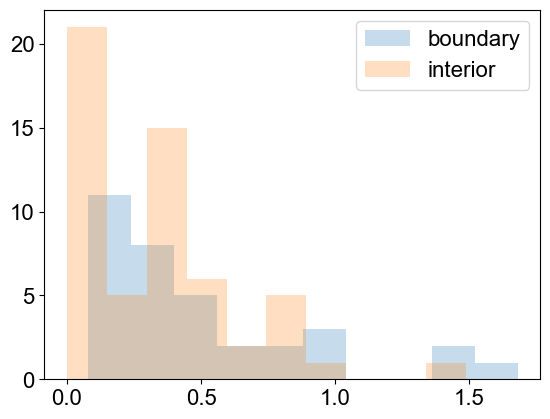

In [176]:
plt.hist((alpha_opt[boundary_list]),alpha=0.25)
plt.hist((alpha_opt[[i for i in range(num_subnw) if i not in boundary_list]]),alpha=0.25)
plt.legend(['boundary','interior'])

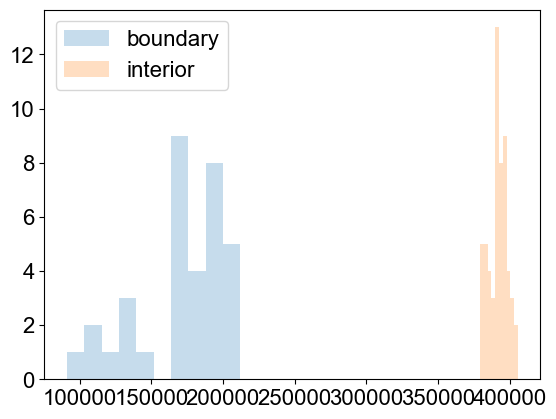

In [177]:
plt.hist((beta_opt[boundary_list]),alpha=0.25)
plt.hist((beta_opt[[i for i in range(num_subnw) if i not in boundary_list]]),alpha=0.25)
plt.legend(['boundary','interior'])
#plt.xscale('log')

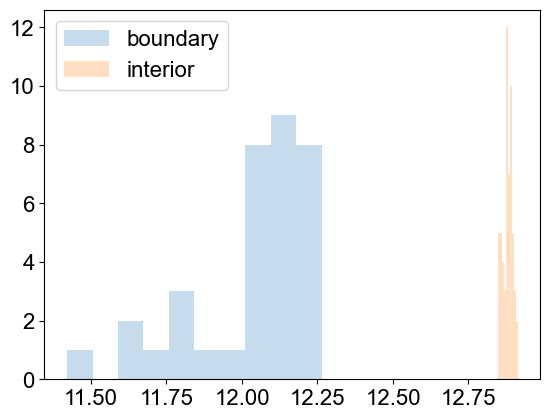

In [175]:
plt.hist(np.log(beta_opt[boundary_list]),alpha=0.25)
plt.hist(np.log(beta_opt[[i for i in range(num_subnw) if i not in boundary_list]]),alpha=0.25)
plt.legend(['boundary','interior'])
#plt.xscale('log')

In [169]:
boundary_list

array([ 0,  1,  2,  4,  9, 11, 13, 15, 16, 22, 24, 32, 34, 37, 38, 41, 46,
       47, 54, 60, 64, 65, 70, 74, 76, 77, 79, 80, 82, 84, 85, 86, 87, 89])

In [170]:
len(boundary_list)

34

#### $\beta$ ordered s.t the boundary species appear first

In [171]:
ordered_beta = np.log(np.append(beta_opt[boundary_list],beta_opt[[i for i in range(num_subnw) if i not in boundary_list]]))

In [172]:
ordered_beta = np.expand_dims(ordered_beta,axis=0)

In [173]:
np.shape(ordered_beta)

(1, 90)

## Find the AUC of the ROC:

/net/theorie/home/harsh/Work/code/memoryFunctions/packages/utilities.py:564: RuntimeWarning: divide by zero encountered in divide
  t = 0.5*(1+ sc.special.erf((threshold[j] - beta[i,:])/(np.sqrt(2)*beta_error[i,:])))


1.0

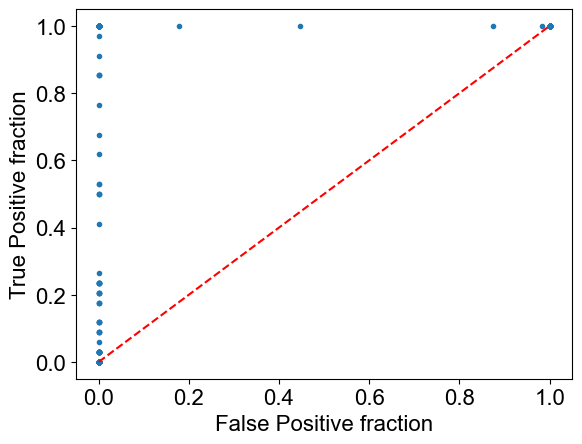

In [174]:
reload(utilities)
utilities.auc_roc(ordered_beta,beta_error=np.zeros(np.shape(ordered_beta)),num_threshold=200,num_bdry=len(boundary_list),method='single',plot=True)

## Question -> Do the AUC-ROC in $\beta$ or $\log \beta$

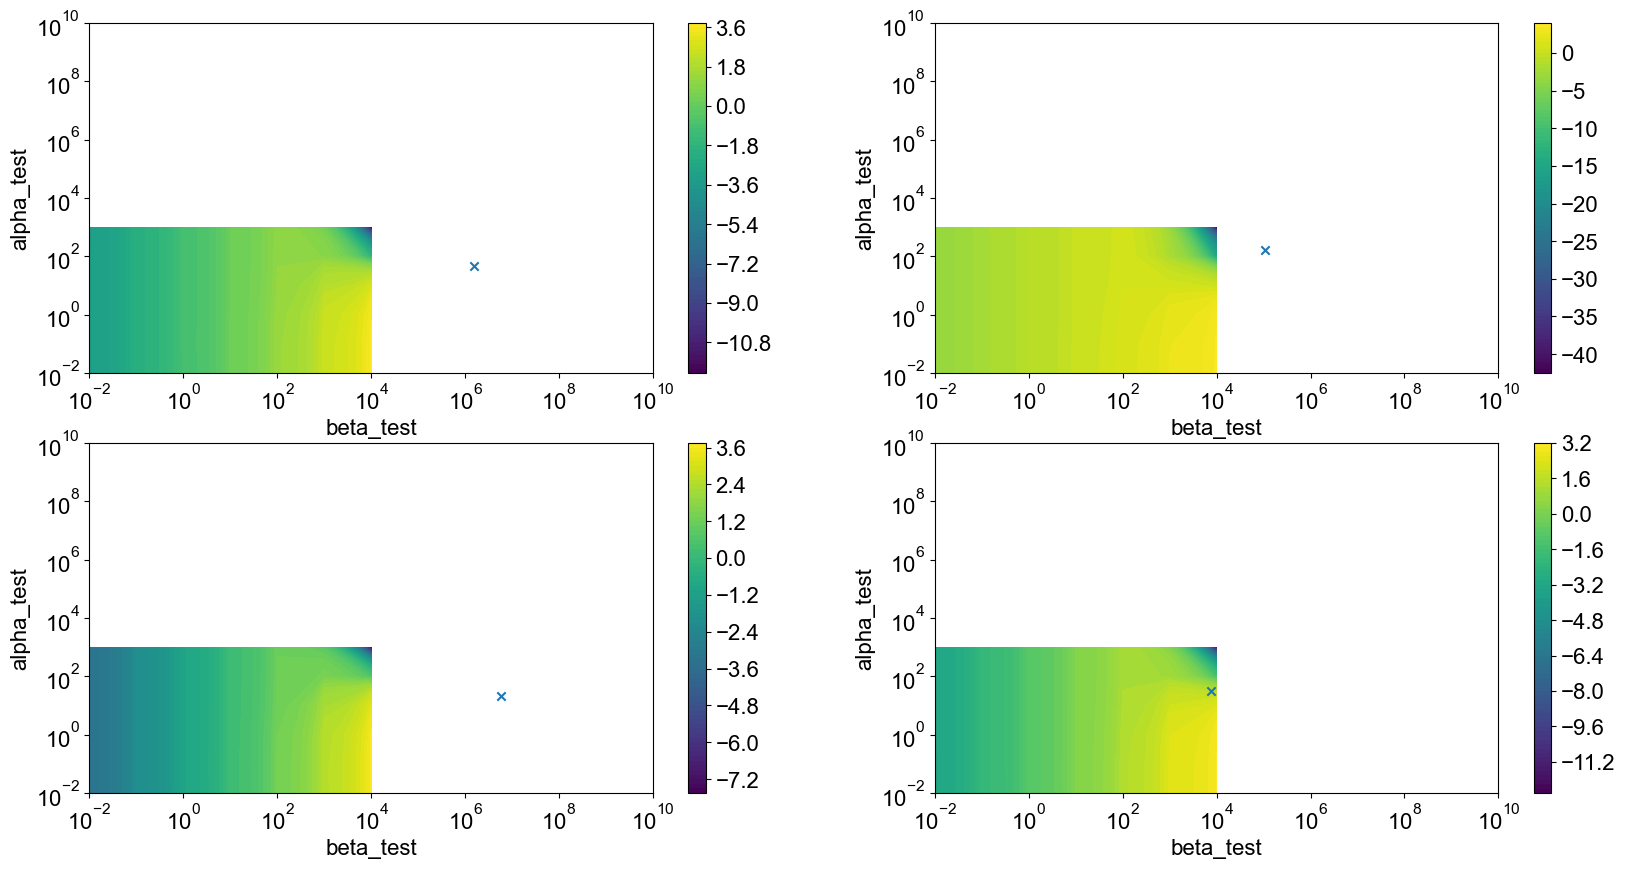

In [165]:
plt.figure(figsize=(20,10))
plt.subplot(221)
#p_landscape[0][p_landscape[0] < 0]=0
plt.contourf(beta_test,alpha_test,p_landscape[0],100)
plt.colorbar()
plt.scatter(beta_opt[0],alpha_opt[0],marker='x')
#plt.imshow(p_landscape[0])
plt.xlabel('beta_test')
plt.ylabel('alpha_test')
plt.xscale('log')
plt.yscale('log')

plt.subplot(222)
#p_landscape[1][p_landscape[1] < 0]=0
plt.contourf(beta_test,alpha_test,p_landscape[1],100)
plt.colorbar()
plt.scatter(beta_opt[1],alpha_opt[1],marker='x')
plt.xlabel('beta_test')
plt.ylabel('alpha_test')
plt.xscale('log')
plt.yscale('log')

plt.subplot(223)
#p_landscape[2][p_landscape[2] < 0]=0
plt.contourf(beta_test,alpha_test,p_landscape[2],100)
plt.colorbar()
plt.scatter(beta_opt[2],alpha_opt[2],marker='x')
plt.xlabel('beta_test')
plt.ylabel('alpha_test')
plt.xscale('log')
plt.yscale('log')

plt.subplot(224)
#p_landscape[3][p_landscape[3] < 0]=0
plt.contourf(beta_test,alpha_test,p_landscape[3],100)
plt.colorbar()
plt.scatter(beta_opt[3],alpha_opt[3],marker='x')
plt.xlabel('beta_test')
plt.ylabel('alpha_test')
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'dx3/dt')

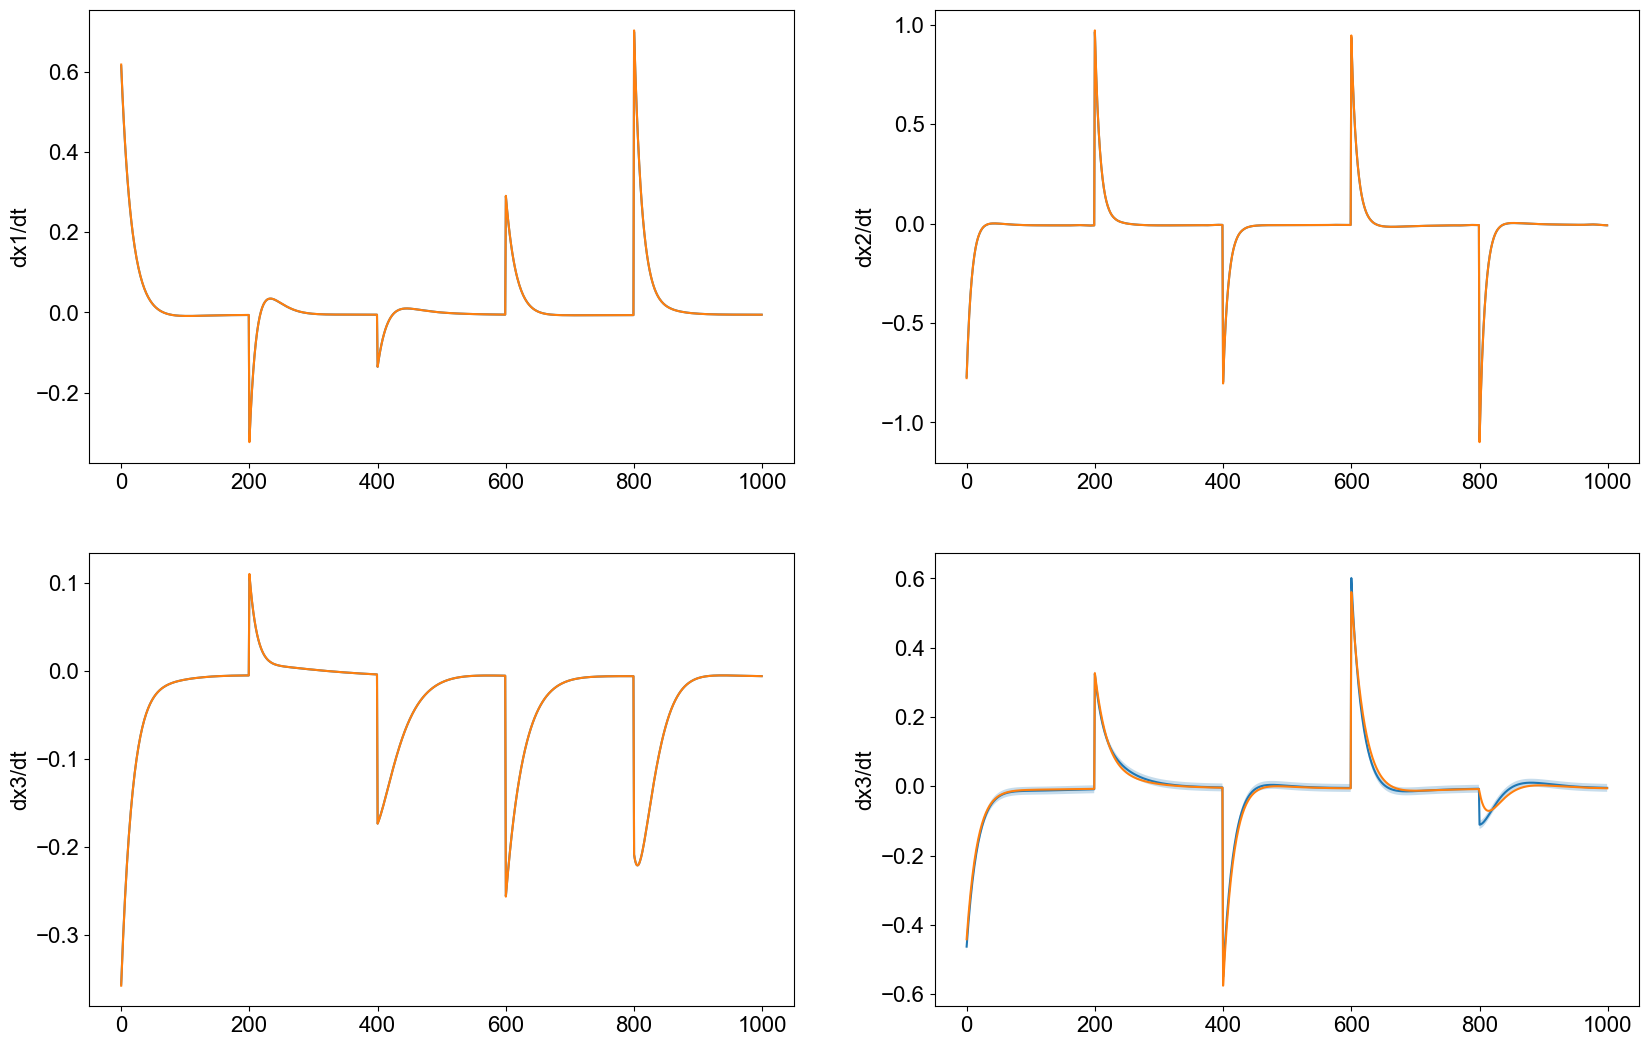

In [167]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
T=1000
plt.plot(np.arange(len(obs))[0:T],ridge_model1[0].predict(d1)[0:T])

plt.fill_between(np.arange(len(obs))[0:T],ridge_model1[0].predict(d1)[0:T]+ ridge_model1[0].predict(d1,return_std=True)[1][0:T]\
                 ,ridge_model1[0].predict(d1)[0:T] - ridge_model1[0].predict(d1,return_std=True)[1][0:T], alpha=0.25)

plt.plot(np.arange(len(obs))[0:T],obs[:T,0])
plt.ylabel('dx1/dt',fontsize=16)

plt.subplot(3,2,2)
plt.plot(np.arange(len(obs))[0:T],ridge_model1[1].predict(d1)[0:T])

plt.fill_between(np.arange(len(obs))[0:T],ridge_model1[1].predict(d1)[0:T]+ ridge_model1[1].predict(d1,return_std=True)[1][0:T]\
                 ,ridge_model1[1].predict(d1)[0:T] - ridge_model1[1].predict(d1,return_std=True)[1][0:T], alpha=0.25)

plt.plot(np.arange(len(obs))[0:T],obs[:T,1])
plt.ylabel('dx2/dt',fontsize=16)

plt.subplot(3,2,3)
plt.plot(np.arange(len(obs))[0:T],ridge_model1[2].predict(d1)[0:T])

plt.fill_between(np.arange(len(obs))[0:T],ridge_model1[2].predict(d1)[0:T]+ ridge_model1[2].predict(d1,return_std=True)[1][0:T]\
                 ,ridge_model1[2].predict(d1)[0:T] - ridge_model1[2].predict(d1,return_std=True)[1][0:T], alpha=0.25)

plt.plot(np.arange(len(obs))[0:T],obs[:T,2])
plt.ylabel('dx3/dt',fontsize=16)

plt.subplot(3,2,4)
plt.plot(np.arange(len(obs))[0:T],ridge_model1[3].predict(d1)[0:T])

plt.fill_between(np.arange(len(obs))[0:T],ridge_model1[3].predict(d1)[0:T]+ ridge_model1[3].predict(d1,return_std=True)[1][0:T]\
                 ,ridge_model1[3].predict(d1)[0:T] - ridge_model1[3].predict(d1,return_std=True)[1][0:T], alpha=0.25)

plt.plot(np.arange(len(obs))[0:T],obs[:T,3])
plt.ylabel('dx3/dt',fontsize=16)

### Plotting the results and the regression GP fit

In [373]:
#Noise Parameters:
#num_basis = int(num_subnw*(num_subnw+3)/2 + 1)
num_basis = np.shape(d1)[1]
A  = []

for i in range(num_subnw):
    A.append(np.diag(alpha_opt[i]*np.ones(num_basis)) + beta_opt[i]*np.matmul(d1.T,d1))

In [521]:
W_mp          = np.zeros([num_basis,num_subnw])
predicted     = np.zeros([len(obs),num_subnw])
predicted_var = np.zeros([len(obs),num_subnw])

for i in range(3):
    W_mp[:,i]          = beta_opt[i]*np.matmul(np.linalg.inv(A[i]),np.matmul(d1.T,obs_noise[:,i]))
    predicted[:,i]     = np.matmul(W_mp[:,i],d1.T)
    for j in range(len(obs)):
        predicted_var[j,i] = np.matmul(utilities.basis_KM(soln[j,0:num_subnw]).T,np.matmul(np.linalg.inv(A[i]),utilities.basis_KM(soln[j,0:num_subnw]))) + 1./beta_opt[i]
        

Text(0, 0.5, 'dx3/dt')

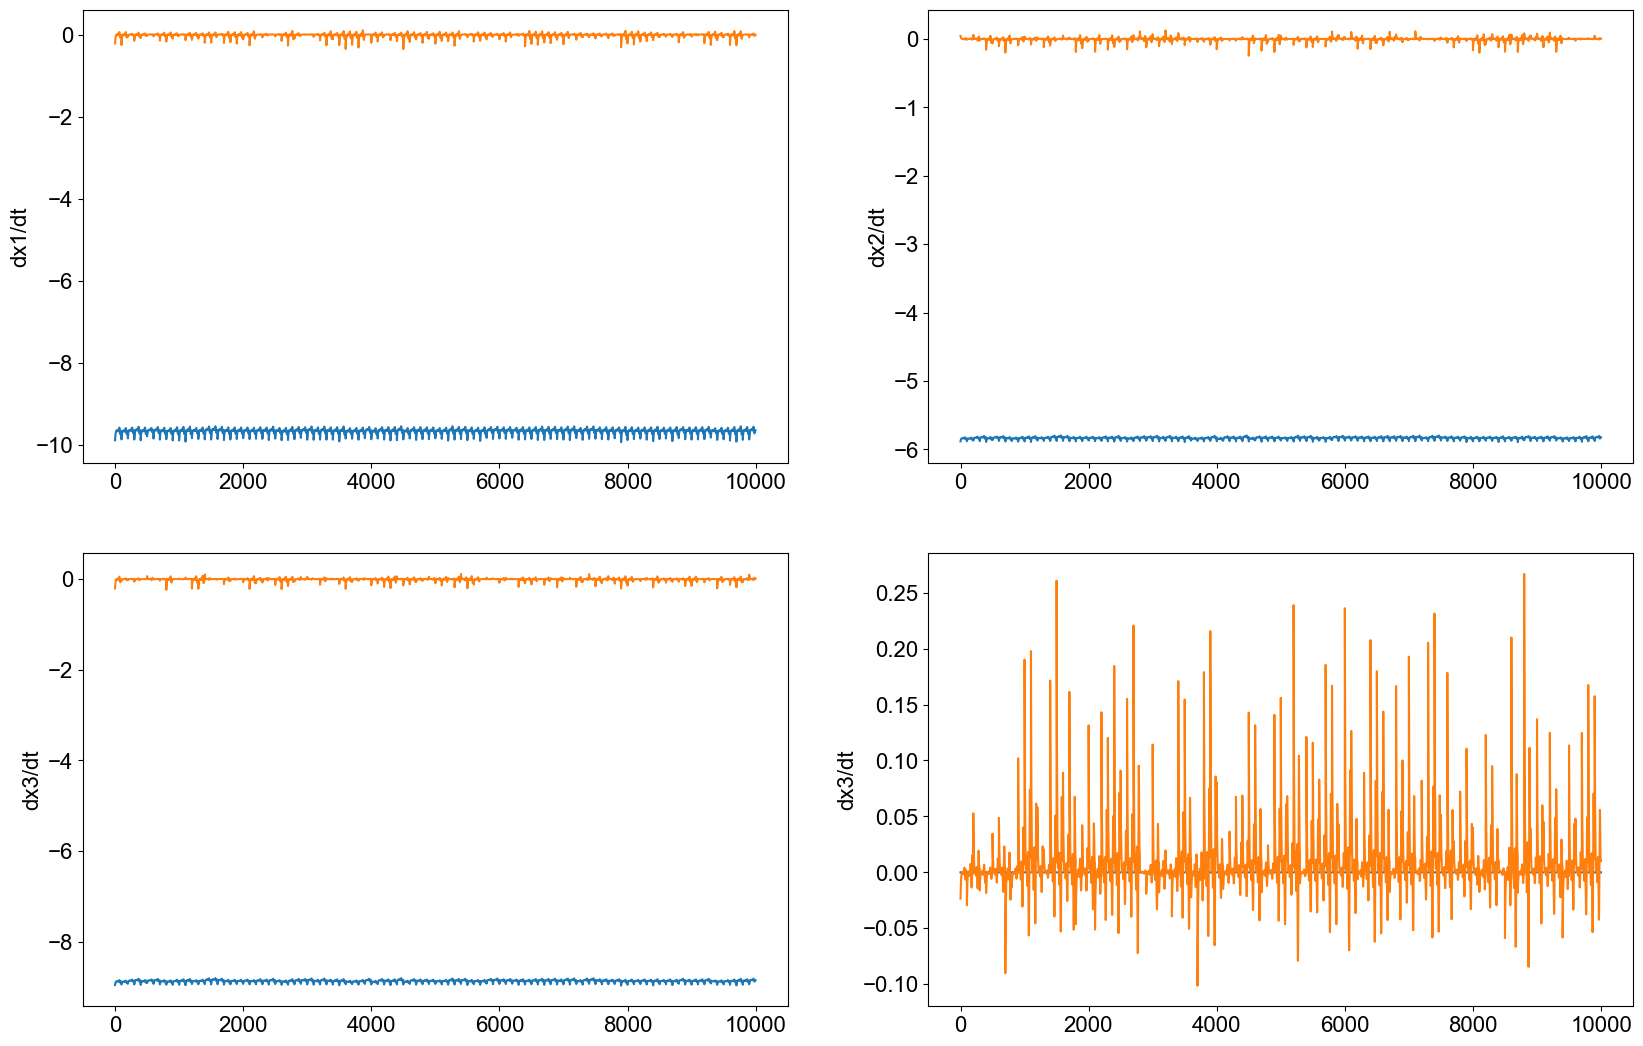

In [523]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.plot(np.arange(len(obs)),predicted[:,0])
plt.fill_between(np.arange(len(obs)), predicted[:,0]+predicted_var[:,0], predicted[:,0]-predicted_var[:,0], alpha=0.25)
plt.plot(np.arange(len(obs)),obs[:,0])
plt.ylabel('dx1/dt',fontsize=16)

plt.subplot(3,2,2)
plt.plot(np.arange(len(obs)),predicted[:,1])
plt.fill_between(np.arange(len(obs)), predicted[:,1]+predicted_var[:,1], predicted[:,1]-predicted_var[:,1], alpha=0.25)
plt.plot(np.arange(len(obs)),obs[:,1])
plt.ylabel('dx2/dt',fontsize=16)

plt.subplot(3,2,3)
plt.plot(np.arange(len(obs)),predicted[:,2],'-')
plt.fill_between(np.arange(len(obs)), predicted[:,2]+predicted_var[:,2], predicted[:,2]-predicted_var[:,2], alpha=0.25)
plt.plot(np.arange(len(obs)),obs[:,2])
plt.ylabel('dx3/dt',fontsize=16)

plt.subplot(3,2,4)
plt.plot(np.arange(len(obs)),predicted[:,4],'-')
plt.fill_between(np.arange(len(obs)), predicted[:,4]+predicted_var[:,4], predicted[:,4]-predicted_var[:,4], alpha=0.25)
plt.plot(np.arange(len(obs)),obs[:,4])
plt.ylabel('dx3/dt',fontsize=16)

Text(0, 0.5, 'dx3/dt')

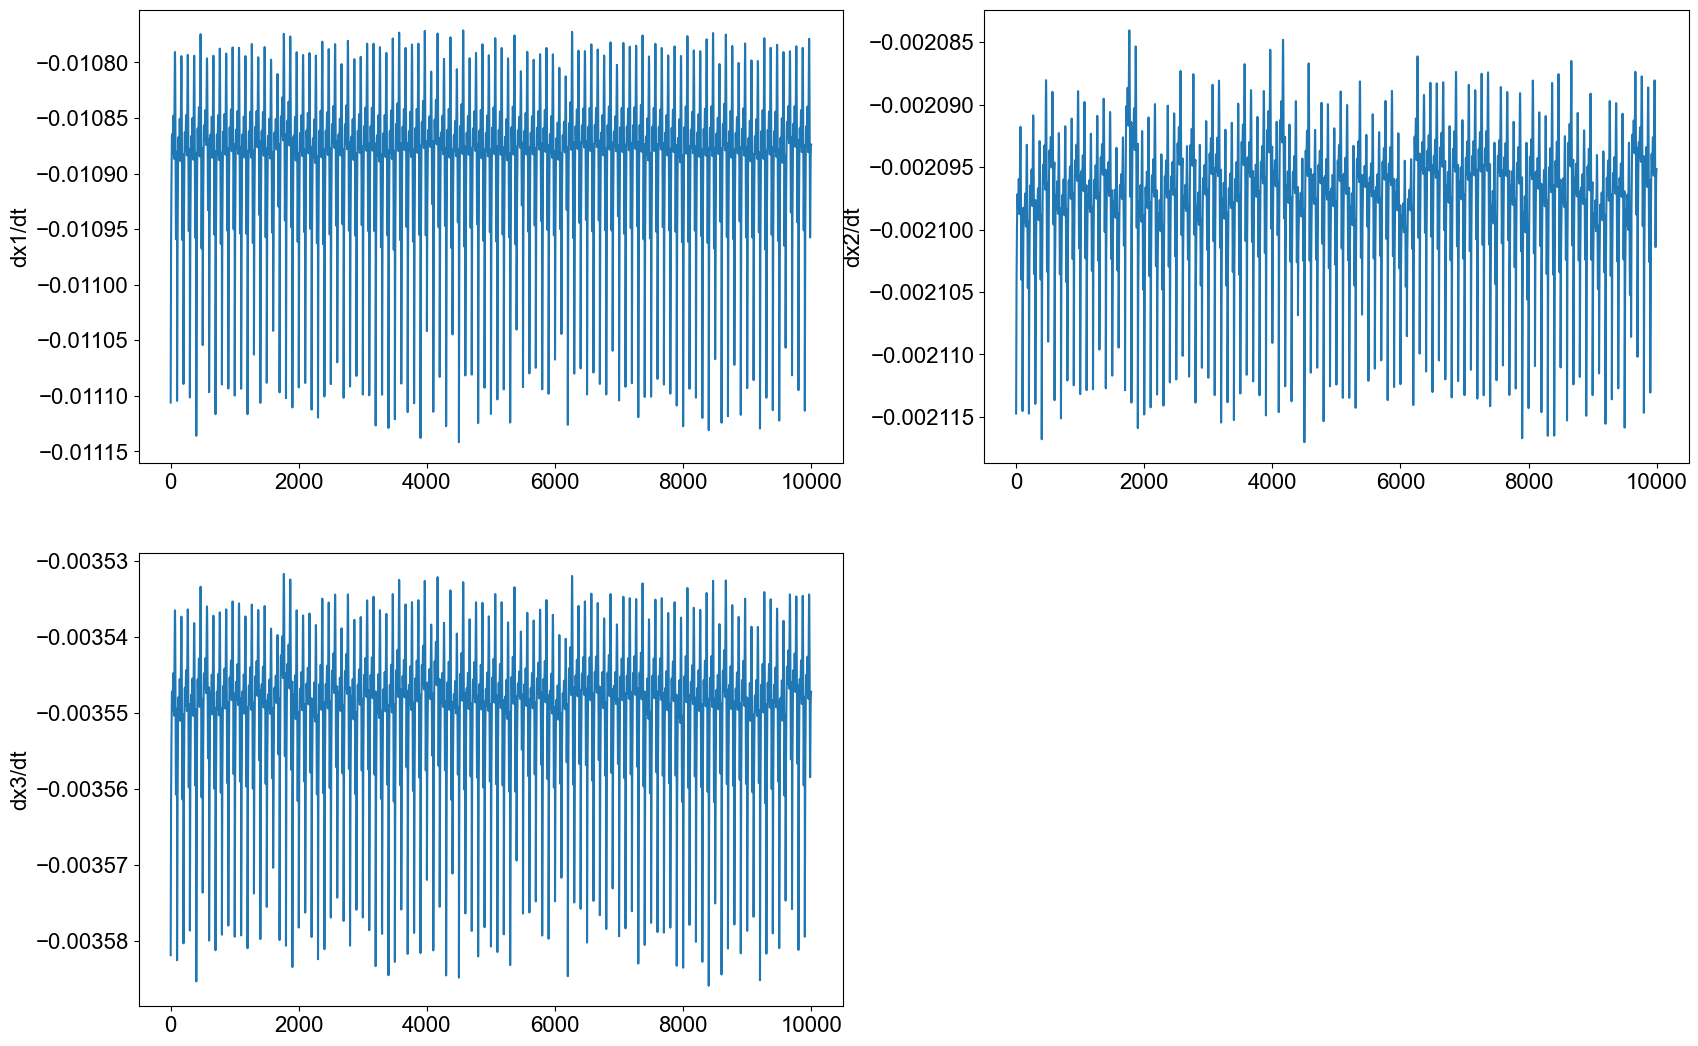

In [454]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.plot(np.arange(len(obs)),predicted[:,0])
#plt.fill_between(np.arange(len(obs)), predicted[:,0]+predicted_var[:,0], predicted[:,0]-predicted_var[:,0], alpha=0.25)
#plt.plot(np.arange(len(obs)),obs_noise[:,0])
plt.ylabel('dx1/dt',fontsize=16)

plt.subplot(3,2,2)
plt.plot(np.arange(len(obs)),predicted[:,1])
#plt.fill_between(np.arange(len(obs)), predicted[:,1]+predicted_var[:,1], predicted[:,1]-predicted_var[:,1], alpha=0.25)
#plt.plot(np.arange(len(obs)),obs_noise[:,1])
plt.ylabel('dx2/dt',fontsize=16)

plt.subplot(3,2,3)
plt.plot(np.arange(len(obs)),predicted[:,2],'-')
#plt.fill_between(np.arange(len(obs)), predicted[:,2]+predicted_var[:,2], predicted[:,2]-predicted_var[:,2], alpha=0.25)
#plt.plot(np.arange(len(obs)),obs_noise[:,2])
plt.ylabel('dx3/dt',fontsize=16)

In [521]:
predicted_var

array([[230.03545379,  22.65335714,  36.43389528],
       [230.03545272,  22.65335705,  36.43389527],
       [230.03545163,  22.65335696,  36.43389526],
       ...,
       [230.03530119,  22.65334419,  36.43389399],
       [230.0353012 ,  22.65334419,  36.43389399],
       [230.0353012 ,  22.65334419,  36.43389399]])

In [283]:
1./beta_opt

array([4.67031387e-03, 4.46486533e-04, 3.79948089e-05])

Text(0, 0.5, 'dx3/dt')

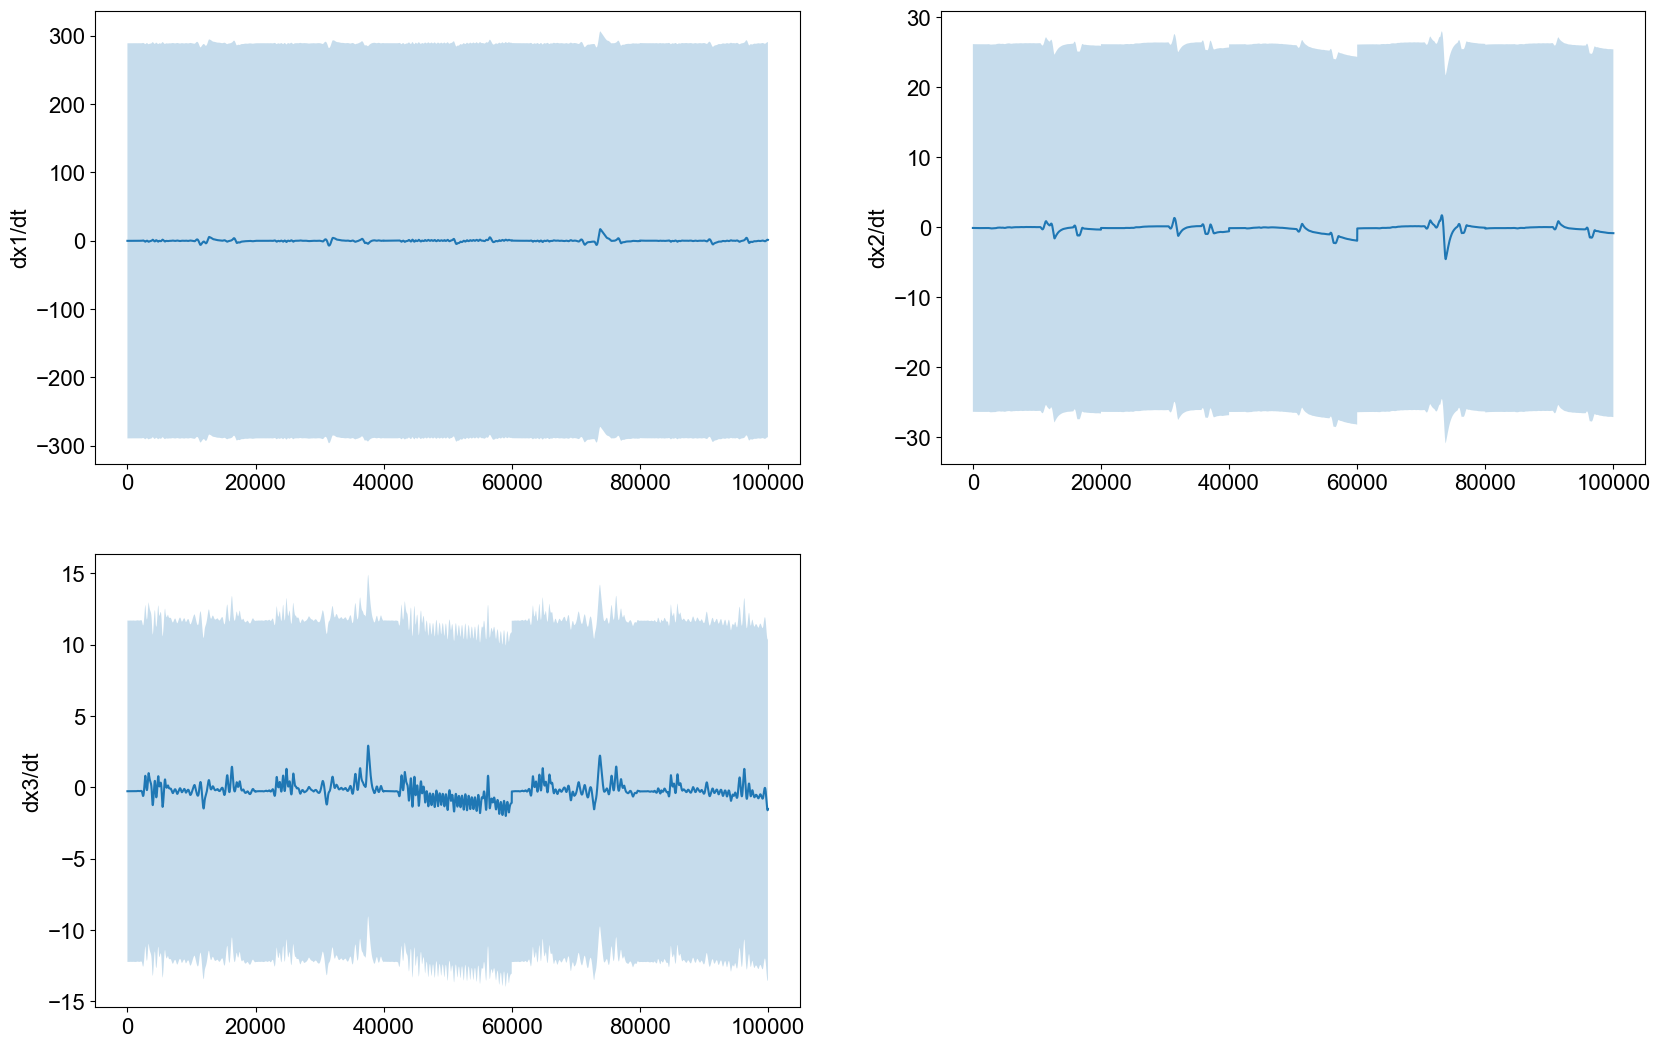

In [450]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.plot(np.arange(len(obs)),predicted[:,0])
plt.fill_between(np.arange(len(obs)), predicted[:,0]+predicted_var[:,0], predicted[:,0]-predicted_var[:,0], alpha=0.25)
#plt.plot(np.arange(len(obs)),obs_noise[:,0])
plt.ylabel('dx1/dt',fontsize=16)

plt.subplot(3,2,2)
plt.plot(np.arange(len(obs)),predicted[:,1])
plt.fill_between(np.arange(len(obs)), predicted[:,1]+predicted_var[:,1], predicted[:,1]-predicted_var[:,1], alpha=0.25)
#plt.plot(np.arange(len(obs)),obs_noise[:,1])
plt.ylabel('dx2/dt',fontsize=16)

plt.subplot(3,2,3)
plt.plot(np.arange(len(obs)),predicted[:,2],'-')
plt.fill_between(np.arange(len(obs)), predicted[:,2]+predicted_var[:,2], predicted[:,2]-predicted_var[:,2], alpha=0.25)
#plt.plot(np.arange(len(obs)),obs_noise[:,2])
plt.ylabel('dx3/dt',fontsize=16)

In [94]:
predicted_var[:,0]

array([2.40352032e-05, 2.40352013e-05, 2.40351993e-05, ...,
       2.40346883e-05, 2.40346883e-05, 2.40346883e-05])

In [95]:
predicted_var[:,1]

array([1.79290157e-05, 1.79290149e-05, 1.79290140e-05, ...,
       1.79287836e-05, 1.79287836e-05, 1.79287836e-05])

### We now calculate the errors on alpha and beta - Fisher Information

We calculte the Fisher Information of the posterior of alpha and beta and using a saddle point approximation we don't perform an integral over the variables 'obs' but just use the maximum of the integral.

In [31]:
alpha_error = np.zeros(num_subnw)
beta_error  = np.zeros(num_subnw)

for i in range(num_subnw):
    
    temp           = second_der_alpha_beta([alpha_opt[i],beta_opt[i]],d1,num_subnw,obs_noise[:,i]*0)*len(obs[:,i])
    alpha_error[i] = temp[1]/(temp[0]*temp[1]-temp[2]**2)
    beta_error[i]  = temp[0]/(temp[0]*temp[1]-temp[2]**2)
    
print(np.sqrt(np.abs(alpha_error)))
print(np.sqrt(np.abs(beta_error)))

[0.0132227  0.0611981  0.06119839]
[0.03457759 3.02345994 3.02345614]


In [26]:
for i in hessian:
    print('alpha_error', np.sqrt(np.abs(i)[0,0]/len(obs[:,0])),'beta_error', np.sqrt(np.abs(i)[1,1]/len(obs[:,0])))

alpha_error 0.01448731955087008 beta_error 0.03469794344087561
alpha_error 0.06723769216814425 beta_error 1.0784446319908643
alpha_error 0.06307892840535288 beta_error 2.997723244308952


### Numerically and exlpicitly calculate the hessian at the optimal solution and check if it matches with the error calculated

In [33]:
alpha_error2 = np.zeros(num_subnw)
beta_error2  = np.zeros(num_subnw)

for i in range(num_subnw):
    alpha_test_opt[i] = np.linspace(0.9*alpha_opt[i],1.1*alpha_opt[i],grid_size)
    beta_test_opt[i]  = np.linspace(0.9*beta_opt[i],1.1*beta_opt[i],grid_size)
    
spacing = np.zeros([num_subnw,2])
hessian_list = []

for i in range(num_subnw):
    spacing[i] = [0.2*alpha_opt[i]/grid_size,0.2*beta_opt[i]/grid_size]
    hessian_list.append(numerical_hessian(p_landscape_opt[i],spacing[i])*len(obs[:,0]))
    
for i in range(num_subnw):
    
    temp[0]        = hessian_list[i][0,0,int(grid_size/2),int(grid_size/2)]
    temp[1]        = hessian_list[i][1,1,int(grid_size/2),int(grid_size/2)]
    temp[2]        = 0.5*hessian_list[i][0,1,int(grid_size/2),int(grid_size/2)] + 0.5*hessian_list[i][1,0,int(grid_size/2),int(grid_size/2)]
    
    alpha_error2[i] = temp[1]/(temp[0]*temp[1]-temp[2]**2)
    beta_error2[i]  = temp[0]/(temp[0]*temp[1]-temp[2]**2)
    
print(np.sqrt(np.abs(alpha_error2)))
print(np.sqrt(np.abs(beta_error2)))

[0.0134702  0.06070932 0.0607096 ]
[0.03427571 2.9962676  2.99626384]


#### Conclusion: The numerical hessian matches well with the one calculated from the analytical expression of the log-probabilities

### We now use find the values of alpha and beta with the maximum probability using a gradient based algorithm with lower bounds = 0 and infinity as the upper bound

In [441]:
beta_opt  = np.zeros(num_subnw)
alpha_opt = np.zeros(num_subnw)
hessian   = []

#op   = sc.optimize.minimize(fun=prob,x0 = init,args=(d1,num_subnw,obs_noise[:,i]),\
#                                  jac=jac,bounds=((10**-10,None),(10**-10,None)))
op         = sc.optimize.OptimizeResult()
op.success = False

for i in range(num_subnw):
    op.success = False
    j=0
    while op.success is False:
        init       = 0.1*np.random.rand(2)*1.01**j
        prob = lambda a,b,c,d: -1*utilities.log_probability(a,b,c,d)
        jac  = lambda a,b,c,d: -1*utilities.gradient_alpha_beta(a,b,c,d)
        
        op   = sc.optimize.minimize(fun=prob,x0 = init,args=(d1,num_subnw,obs_noise[:,i]),\
                                  jac=jac,bounds=((10**-10,None),(10**-10,None)))
        j   += 1
        alpha_opt[i],beta_opt[i] = op.x
        hessian.append(op.hess_inv*np.identity(2))
print(alpha_opt,beta_opt)

[0.00546761 0.09344363 0.94653734] [0.00345863 0.03807614 0.08359736]


### Calculate the gradient at the optimal point, should be very close to zero!

In [544]:
gradient = np.zeros([num_subnw,2])
for k in range(num_subnw):
    gradient[k] = utilities.gradient_alpha_beta([alpha_opt[k],beta_opt[k]],d1,num_subnw,obs[:,k])
print(gradient)

[[-0.00545354  0.00063388]
 [-0.00680833  0.00022244]
 [-0.00598123  0.00027783]
 [-0.00546035  0.00055503]
 [-0.00592848  0.00034629]
 [-0.00709227  0.00036207]
 [-0.00555368  0.00057849]
 [-0.0054002   0.00038981]
 [-0.00522852  0.00075176]
 [-0.0051344   0.00040464]
 [-0.00708942  0.00023439]
 [-0.00667953  0.00025686]
 [-0.00313486  0.0003069 ]
 [-0.00520992  0.00046598]
 [-0.00525544  0.00043274]
 [-0.00453924  0.00051647]
 [-0.00582919  0.00054389]
 [-0.00746971  0.00019294]
 [-0.0044432   0.00066383]
 [-0.00623621  0.00018653]
 [-0.00542727  0.0004168 ]
 [-0.00588659  0.00027994]
 [-0.00568392  0.00052185]
 [-0.00719527  0.00017902]
 [-0.00636887  0.00023769]
 [-0.00537666  0.00017593]
 [-0.0077371   0.00026264]
 [-0.0064768   0.0005117 ]
 [-0.0065183   0.00017989]
 [-0.00679456  0.00015302]
 [-0.00500087  0.00012162]
 [-0.00557614  0.00038969]
 [-0.00575917  0.00023767]
 [-0.00725404  0.00019947]
 [-0.00748039  0.00020851]
 [-0.00278727  0.00054052]
 [-0.0025466   0.00030452]
 

### Plotting the log-likelihood near the optimal points:

In [299]:
d1          = utilities.design_matrix_KM(soln[:,0:3]) # The design matrix with the basis functions evaluated at all time points
grid_size       = 100
alpha_test_opt  = np.zeros([num_subnw,grid_size])
beta_test_opt   = np.zeros([num_subnw,grid_size])
p_landscape_opt = np.zeros([num_subnw,grid_size,grid_size])
p_gradient      = np.zeros([num_subnw,grid_size,grid_size])
p_hessian       = np.zeros([num_subnw,grid_size,grid_size])

for i in range(num_subnw):
    alpha_test_opt[i] = np.linspace(0.99*alpha_opt[i],1.01*alpha_opt[i],grid_size)
    beta_test_opt[i]  = np.linspace(0.99*beta_opt[i],1.01*beta_opt[i],grid_size)
    
for i in range(grid_size):
    for j in range(grid_size):
        for k in range(num_subnw):
            p_landscape_opt[k,i,j] = utilities.log_probability([alpha_test_opt[k,i],beta_test_opt[k,j]],d1,num_subnw,obs_noise[:,k])

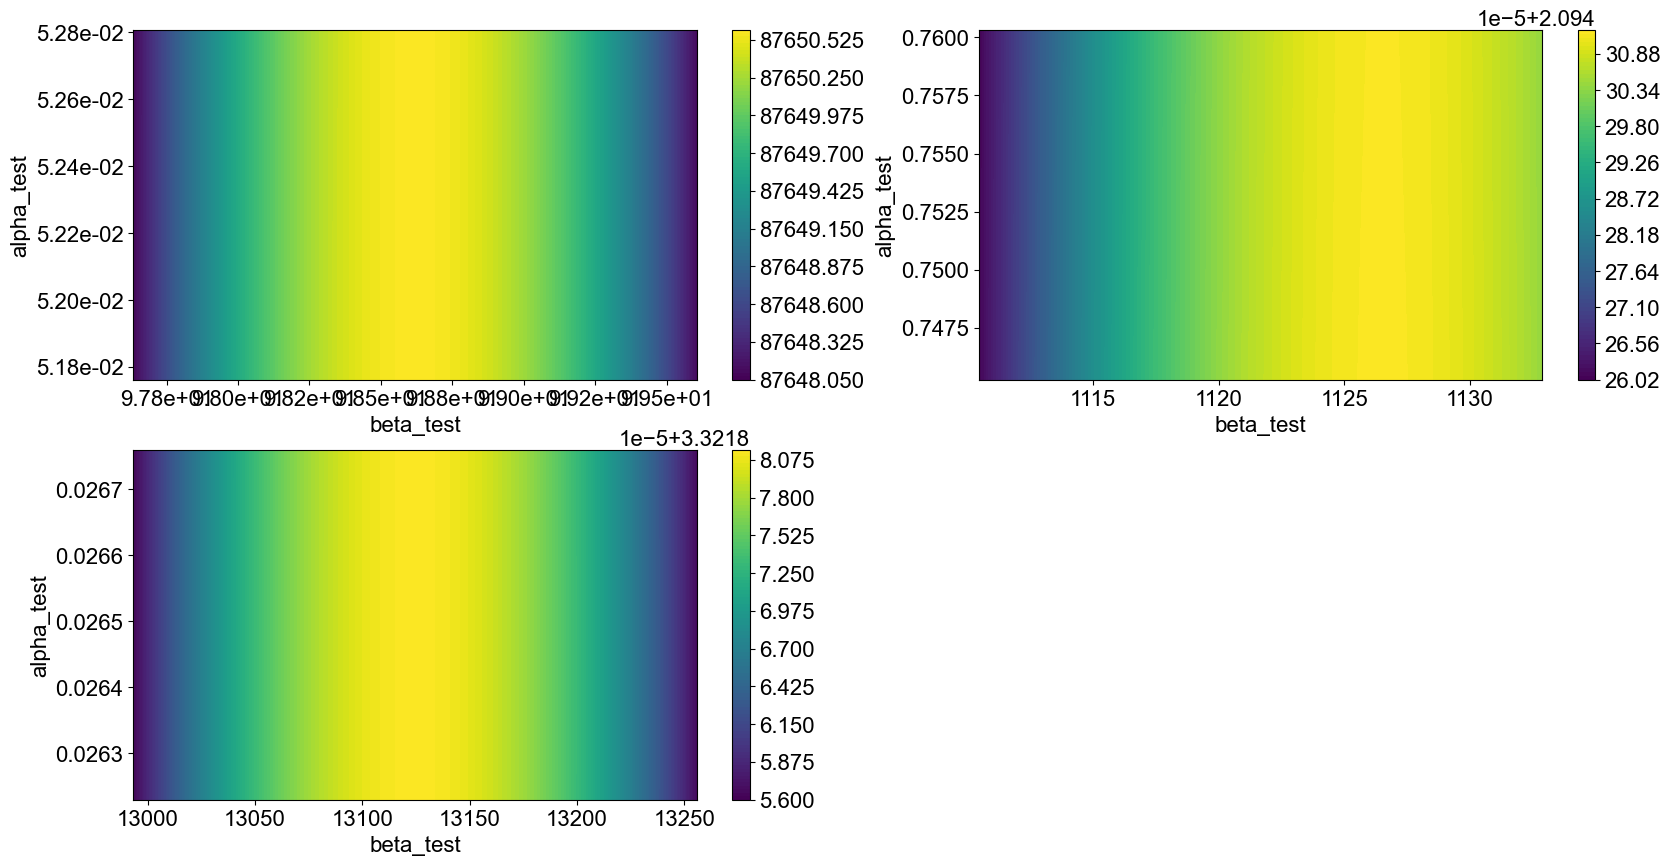

In [300]:
import matplotlib.ticker as mtick
plt.figure(figsize=(20,10))
ax = plt.subplot(221)
plt.contourf(beta_test_opt[0],alpha_test_opt[0],(p_landscape_opt[0]*len(obs_noise[:,0])),100)
#plt.imshow(p_landscape[0])
plt.xlabel('beta_test')
plt.ylabel('alpha_test')
plt.colorbar()
#plt.xscale('log')
#plt.yscale('log')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

plt.subplot(222)
plt.contourf(beta_test_opt[1],alpha_test_opt[1],p_landscape_opt[1],100)
plt.xlabel('beta_test')
plt.ylabel('alpha_test')
plt.colorbar()
#plt.xscale('log')
#plt.yscale('log')

plt.subplot(223)
plt.contourf(beta_test_opt[2],alpha_test_opt[2],p_landscape_opt[2],100)
plt.xlabel('beta_test')
plt.ylabel('alpha_test')
plt.colorbar()
#plt.xscale('log')
#plt.yscale('log')